# Bienvenida

Mi nombre es Francisco Delgado Ayala. He realizado el siguiente Notebook de Jupyter utilizando Python 3, y las librerías incluidas en Anaconda, procurando facilitar la lectura y comprensión del código a través de comentarios explicativos en cada paso.

Espero que el uso de Python facilite la enseñanza de la estadística, la metodología de la investigación y la ciencia de datos en áreas donde será de gran utilidad, tanto para el crecimiento del conocimiento como para el desarrollo de los médicos en formación. Es importante recalcar que algunos términos utilizados en este archivo son empleados por "convención" en cuanto al código, y otros para facilitar la descripción.

## Definiciones

- **Marco de datos** (Dataframe): En el contexto de programación y ciencia de datos, un Dataframe es una estructura bidimensional de datos, similar a una tabla de base de datos, una hoja de cálculo de Excel o una tabla de datos en estadísticas. Está organizado en columnas que pueden contener datos de diferentes tipos (como números, cadenas, entre otros) y permite realizar operaciones como filtrado, agrupación y agregación de datos. Las librerías de Python, como pandas, ofrecen herramientas para manipular Dataframes de manera efectiva.
- **Librería**: En programación, es una colección de funciones y procedimientos que facilita realizar tareas específicas sin redactar código desde cero. (Nota: Aunque en algunos contextos hispanohablantes "librería" se relaciona con libros, en programación se emplea para describir esta colección de herramientas).

## Pruebas estadísticas

Estos términos son ampliamente usados en estadística y en la evaluación de modelos de clasificación y regresión. A continuación, te describiré cómo se calcula cada uno:

1. **Exactitud (Accuracy)**: 
    - `(VP+VN) / (VP+VN+FP+FN)`

2. **Precisión o Valor Predictivo Positivo (VPP)**:
    - `(VP) / (VP+FP)`

3. **Sensibilidad (Recall)**:
    - `(VP) / (VP+FN)`
    - Es la proporción de positivos reales que fueron identificados correctamente.

4. **F1-Score**:
    - `2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)`
    - Es la media armónica entre precisión y sensibilidad.

5. **Especificidad**:
    - `(VN) / (VN + FP)`
    - Es la proporción de negativos reales que fueron identificados correctamente.

6. **Valor Predictivo Negativo (VPN)**:
    - `(VN) / (VN + FN)`

7. **Error Absoluto Medio (MAE)**:
    - `sum(abs(y_real - y_pred)) / n`
    - Es el promedio de las diferencias absolutas entre los valores observados y los predichos. Proporciona una idea de cuán erradas son las predicciones en promedio.

8. **Error Cuadrático Medio (MSE)**:
    - `sum((y_real - y_pred)^2) / n`
    - Es el promedio de los cuadrados de las diferencias entre los valores observados y los predichos. Penaliza más los errores grandes.

9. **Raíz del Error Cuadrático Medio (RMSE)**:
    - `sqrt(MSE)`
    - Es la raíz cuadrada del MSE. Está en las mismas unidades que la variable objetivo y es útil para interpretar el tamaño del error.

10. **Coeficiente de Determinación (R²)**:
    - `1 - (sum((y_real - y_pred)^2) / sum((y_real - media(y_real))^2))`
    - Indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. Un R² cercano a 1 indica un buen ajuste del modelo.

## 1.-Importando las librerías y archivos necesarios y realizando los ajustes iniciales
### 1.1.-Realizaremos un análisis inicial de los tipos de datos y llevaremos a cabo un análisis exploratorio

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, zscore
import openpyxl as op
from openpyxl import load_workbook
from openpyxl import Workbook
import sklearn

In [290]:
np.random.seed(1)

# Generamos y ordenamos el arreglo aleatorio
arreglo_aleatorio = np.sort(np.random.randint(1, 150, size = 3))
print('Semilla de arreglo aleatorio: ', arreglo_aleatorio)

Semilla de arreglo aleatorio:  [ 38  73 141]


In [291]:
archivo = 'datos.xlsx'

df = pd.read_excel(archivo, sheet_name = 'p1')
df.sort_index(inplace = True)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e       641 non-null    int64  
 1   s       641 non-null    int64  
 2   u       636 non-null    float64
 3   p       641 non-null    float64
 4   t       641 non-null    float64
 5   ts      637 non-null    float64
 6   td      637 non-null    float64
 7   gs      641 non-null    int64  
 8   c       641 non-null    int64  
 9   hdl     641 non-null    int64  
 10  cc      552 non-null    float64
 11  pp      115 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 60.2 KB


In [293]:
df.isnull().sum()

e        0
s        0
u        5
p        0
t        0
ts       4
td       4
gs       0
c        0
hdl      0
cc      89
pp     526
dtype: int64

## 2.-Limpieza de datos
Transformación de tipo de datos

In [294]:
# Convertir cm a m
df['cc'] = df['cc'] / 100

# Agregaremos las columnas de imc, cct, cnhdl, chdl
df['imc'] = (df['p'] / (df['t'] ** 2))
df['cct'] = df['cc'] / df['t']
df['cnhdl'] = df['c'] - df['hdl']
df['chdl'] = df['c'] / df['hdl']

df.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,18,1,1.0,62.0,1.55,101.0,70.0,85,188,53,0.81,NaN,25.806452,0.522581,135,3.547170
1,18,2,1.0,70.0,1.67,93.0,63.0,86,155,54,0.90,NaN,25.099502,0.538922,101,2.870370
2,19,1,1.0,56.0,1.58,109.0,73.0,93,143,60,0.67,33.6,22.432303,0.424051,83,2.383333
3,19,1,1.0,52.2,1.59,108.0,75.0,93,143,60,0.67,33.6,20.647917,0.421384,83,2.383333
4,19,1,1.0,53.0,1.54,118.0,72.0,83,146,52,0.73,NaN,22.347782,0.474026,94,2.807692


In [295]:
df.dtypes

e          int64
s          int64
u        float64
p        float64
t        float64
ts       float64
td       float64
gs         int64
c          int64
hdl        int64
cc       float64
pp       float64
imc      float64
cct      float64
cnhdl      int64
chdl     float64
dtype: object

In [296]:
df_categorico = df.copy()
df_numerico = df.copy()

# Convertimos las variables categoricas
df_categorico['s'] = df_categorico['s'].map({1: '1', 2: '2'})
df_categorico['u'] = df_categorico['u'].map({1: '1', 2: '2', 3: '3', 4: '4'})

df_categorico['s'] = df_categorico['s'].astype('category')
df_categorico['u'] = df_categorico['u'].astype('category')

In [297]:
# Estandarizaremos los datos y convertiremos las variables correspondientes a tipo categórica y 
# numérica para facilitar el análisis estadístico

# 1. Creamos una función para estandarizar y desestandarizar todas las columnas necesarias
# 1.1. Funciones
def estandarizar_todas_columnas(df, todas_columnas_a_estandarizar, todas_medias_columnas, todas_desviaciones_columnas):
    for columna in todas_columnas_a_estandarizar:
        df[columna] = (df[columna] - todas_medias_columnas[columna]) / todas_desviaciones_columnas[columna]
    return df

def desestandarizar_todas_columnas(df, todas_columnas_a_estandarizar, todas_medias_columnas, todas_desviaciones_columnas):
    for columna in todas_columnas_a_estandarizar:
        df[columna] = (df[columna] * todas_desviaciones_columnas[columna]) + todas_medias_columnas[columna]
    return df

# 1.2. Definimos las columnas de las "estandarizar_todas_columnas" y "desestandarizar_todas_columnas"
todas_columnas_a_estandarizar = ['e', 's', 'u', 'p',
                                  't', 'ts', 'td', 'gs',
                                  'c', 'hdl', 'cc', 'pp',
                                  'imc', 'cct', 'cnhdl', 'chdl']

# 2. Creamos una función para estandarizar y desestandarizar las columnas necesarias
# 2.1. Funciones
def estandarizar_columnas(df, columnas_a_estandarizar, medias_columnas, desviaciones_columnas):
    for columna in columnas_a_estandarizar:
        df[columna] = (df[columna] - medias_columnas[columna]) / desviaciones_columnas[columna]
    return df

def desestandarizar_columnas(df, columnas_a_estandarizar, medias_columnas, desviaciones_columnas):
    for columna in columnas_a_estandarizar:
        df[columna] = (df[columna] * desviaciones_columnas[columna]) + medias_columnas[columna]
    return df

# 2.2. Definimos las columnas de las "estandarizar_columnas" y "desestandarizar_columnas"
columnas_a_estandarizar = ['e', 'p', 't', 'ts', 'td',
                           'gs', 'c', 'hdl', 'cc', 'pp',
                           'imc', 'cct', 'cnhdl', 'chdl']

# 3. Definimos una función para exportar salidas a excel
# 3.1. Exportar los datos imputados a un archivo excel
def exportar_imputados_a_excel (df, sheet_name):
    filepath = 'datos.xlsx'
    with pd.ExcelWriter(filepath, mode = 'a', if_sheet_exists = 'replace') as writer:
        df.to_excel(writer, sheet_name = sheet_name, index = False)

# 3.2. Exportar los resultados de métricas a un archivo excel
def exportar_metricas_a_excel (df, sheet_name):
    filepath = 'resultadospython.xlsx'
    with pd.ExcelWriter(filepath, mode = 'a', if_sheet_exists = 'replace') as writer:
        df.to_excel(writer, sheet_name = sheet_name, index = False)

In [298]:
# Estandarizaremos df_categorico y df_numerico

# Primero copiamos los dataframes
df_ce = df_categorico.copy()
# df_ce = DataFrame Categorico Estandarizado
df_ne = df_numerico.copy()
# df_ne = DataFrame Numerico Estandarizado

# Segundo definimos "medias_columnas" y "desviaciones_columnas"
medias_columnas = df_ce[columnas_a_estandarizar].mean()
desviaciones_columnas = df_ce[columnas_a_estandarizar].std()

# Tercero definimos "todas_medias_columnas" y "todas_desviaciones_columnas"
todas_medias_columnas = df_ne[todas_columnas_a_estandarizar].mean()
todas_desviaciones_columnas = df_ne[todas_columnas_a_estandarizar].std()

# Cuarto estandarizamos los dataframes

# Estandarizar df_ce
df_ce = estandarizar_columnas(
    df_ce,
    columnas_a_estandarizar,
    medias_columnas,
    desviaciones_columnas
)

# Estandarizar df_ne
df_ne = estandarizar_todas_columnas(
    df_ne,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

In [299]:
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   e       641 non-null    float64 
 1   s       641 non-null    category
 2   u       636 non-null    category
 3   p       641 non-null    float64 
 4   t       641 non-null    float64 
 5   ts      637 non-null    float64 
 6   td      637 non-null    float64 
 7   gs      641 non-null    float64 
 8   c       641 non-null    float64 
 9   hdl     641 non-null    float64 
 10  cc      552 non-null    float64 
 11  pp      115 non-null    float64 
 12  imc     641 non-null    float64 
 13  cct     552 non-null    float64 
 14  cnhdl   641 non-null    float64 
 15  chdl    641 non-null    float64 
dtypes: category(2), float64(14)
memory usage: 71.8 KB


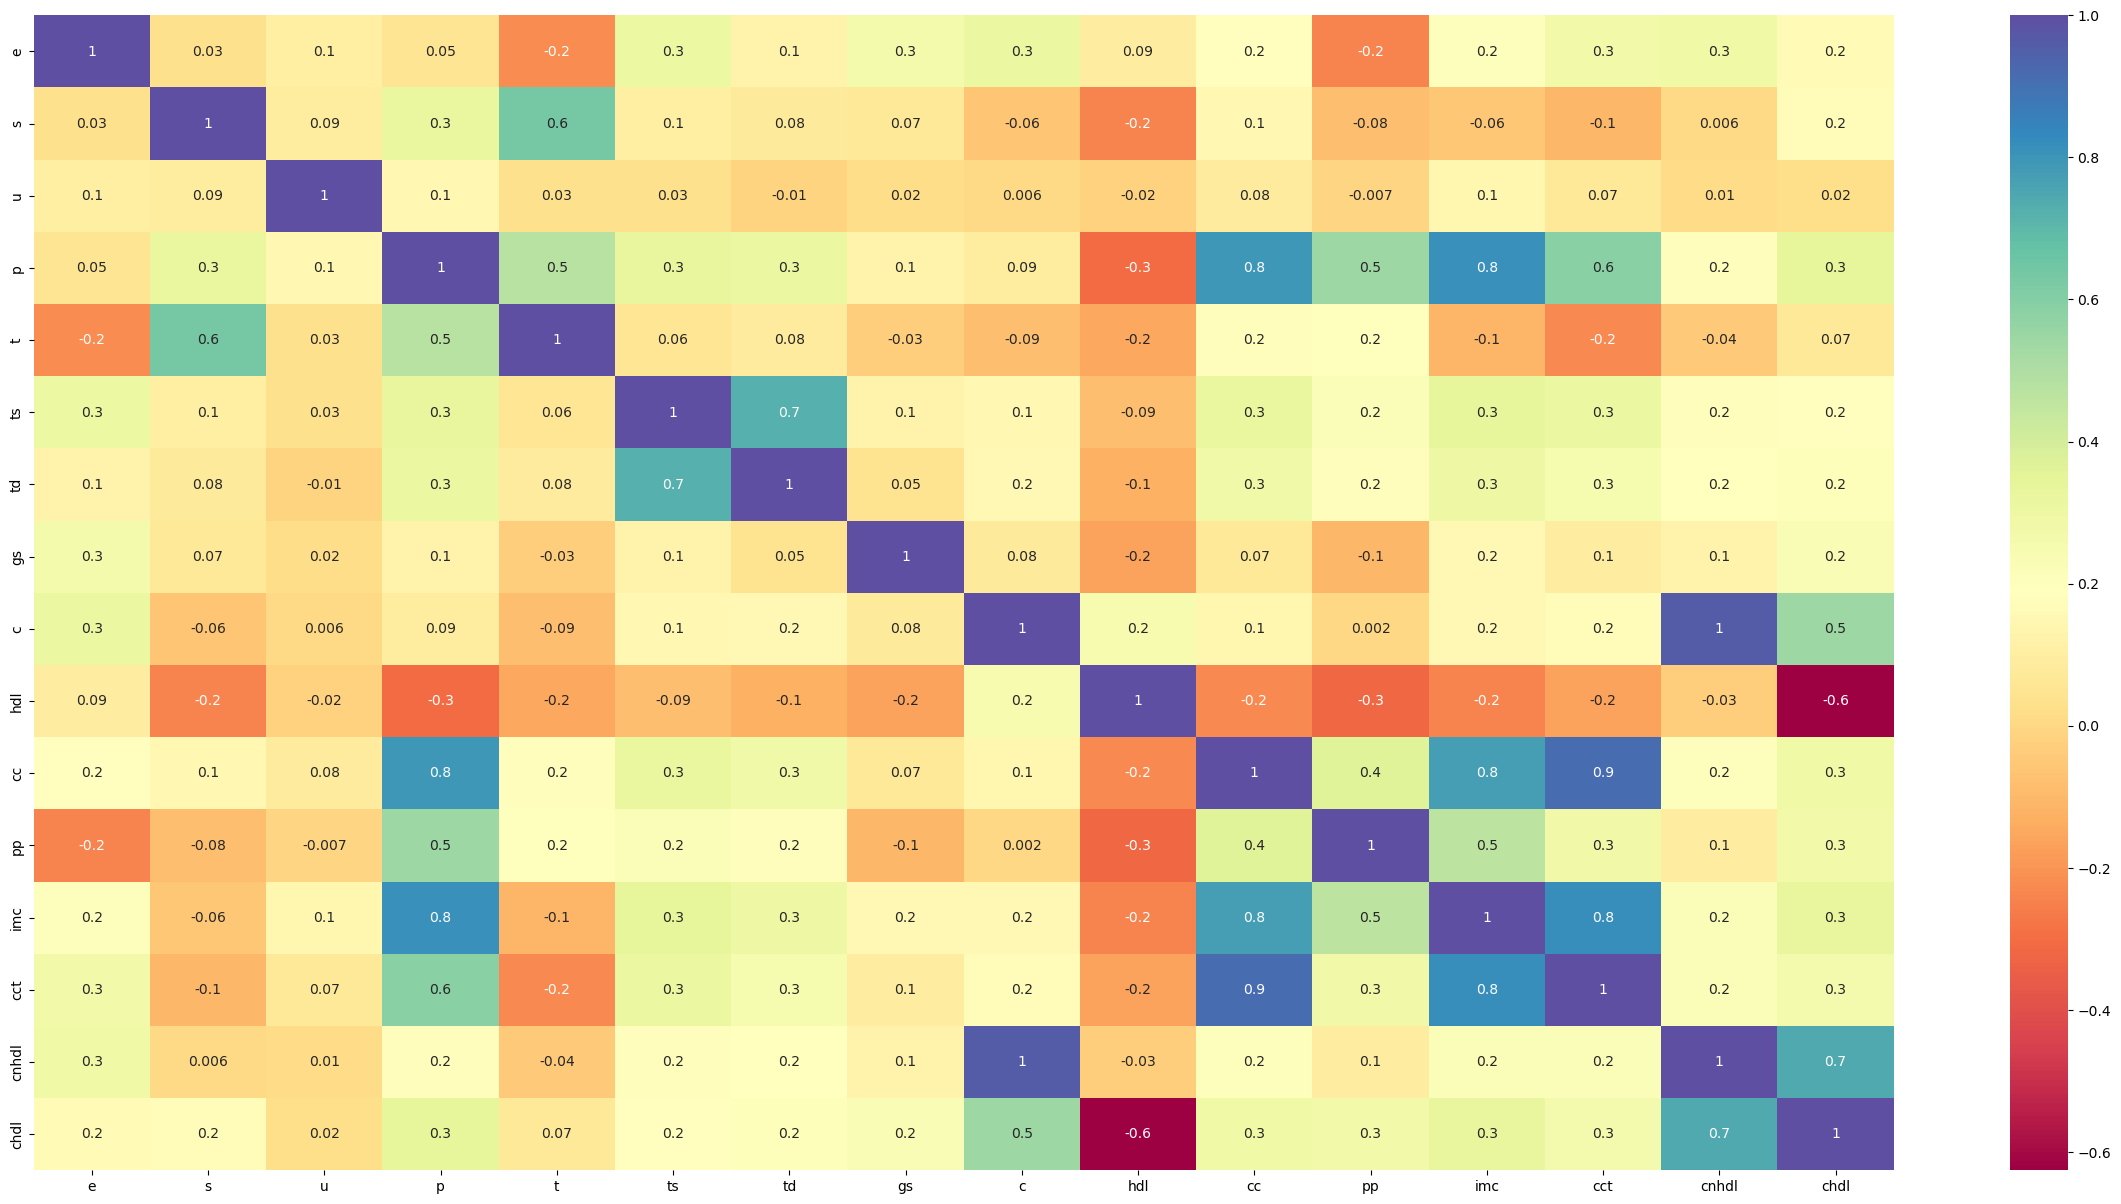

In [300]:
corrMatrix = df_ne.corr()
f, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(corrMatrix, annot = True, fmt = '.1g', ax = ax, cmap = 'Spectral');

In [301]:
resumen = df_ce.describe()
resumen

,e,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
count,6.410000e+02,6.410000e+02,6.410000e+02,6.370000e+02,6.370000e+02,6.410000e+02,6.410000e+02,6.410000e+02,5.520000e+02,1.150000e+02,6.410000e+02,5.520000e+02,6.410000e+02,6.410000e+02
mean,1.330189e-16,-1.995284e-16,-1.651652e-15,3.123265e-16,-6.051325e-16,1.995284e-16,3.436322e-16,-1.274765e-16,-2.574430e-17,7.568825e-16,-8.646230e-16,4.505253e-16,3.768869e-16,-2.771228e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.927156e+00,-2.263413e+00,-2.584371e+00,-2.429049e+00,-2.855824e+00,-1.082106e+00,-2.652081e+00,-2.150472e+00,-3.150918e+00,-4.303369e+00,-2.136285e+00,-2.927178e+00,-2.606329e+00,-2.479682e+00
25%,-8.371547e-01,-6.776946e-01,-7.181943e-01,-7.364990e-01,-6.032734e-01,-4.136759e-01,-7.221777e-01,-6.461243e-01,-6.285605e-01,-7.621352e-01,-7.049643e-01,-6.547076e-01,-6.950380e-01,-7.398169e-01
50%,1.308054e-03,-1.010696e-01,-1.350140e-01,-4.694148e-02,-4.013572e-02,-2.131469e-01,-1.223430e-01,-8.199398e-02,-4.001044e-02,5.507271e-02,-8.195214e-02,-4.262809e-02,-1.566460e-01,-1.289371e-01
75%,7.559245e-01,5.817758e-01,6.814385e-01,5.799290e-01,6.356295e-01,5.422523e-02,6.339703e-01,5.761580e-01,6.326182e-01,5.998780e-01,6.141877e-01,6.682408e-01,6.240223e-01,6.639452e-01
max,2.516696e+00,4.109810e+00,3.597340e+00,4.153091e+00,4.464966e+00,9.412248e+00,4.415537e+00,4.901157e+00,2.818661e+00,1.961891e+00,3.791596e+00,3.156258e+00,4.608123e+00,5.127676e+00


resumen = df_ce.describe()
# Calculamos la varianza
resumen.loc['varianza'] = df_ce.var().tolist()
# Calculamos el rango
resumen.loc['rango'] = resumen.loc['max'] - resumen.loc['min']
# Calculamos el rango intercuartil
resumen.loc['IQR'] = resumen.loc['75%'] - resumen.loc['25%']

# Calculamos la moda
moda = df_ce.mode().iloc[0].tolist()
resumen.loc['moda'] = moda

# Calculamos la kurtosis

# Calculamos la asimetría

# Métodos de predicción

In [302]:
# Librerías generales de Python
from itertools import cycle

# Librerías para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, RocCurveDisplay

# Librerías para regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Librerías para preprocesamiento
from sklearn.preprocessing import LabelBinarizer

# Librerías para evaluación y visualización
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

### Métodos de Clasificación

#### Variable 'u' (turno)

In [303]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_ce.copy()
datos = df_ce[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'u'
variables_predictoras = [columna for columna in datos.columns if 
                         columna != variable_objetivo and columna not in 
                         ['ts', 'td', 'cc', 'pp', 'cct']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

In [304]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba_u = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = arreglo_aleatorio[0],
    stratify = y
    )

##### Arból de decisión

Estructura de la matriz: (165, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

y_puntaje:
[[0.79816514 0.06422018 0.05504587 0.08256881]
 [0.79816514 0.06422018 0.05504587 0.08256881]]

y_puntaje.ravel():
[0.79816514 0.06422018 0.05504587 0.08256881 0.79816514 0.06422018
 0.05504587 0.08256881]

Profundidad óptima del árbol de desición arbolu: 3
Exactitud de arbolu: 0.61
Precisión de arbolu: 0.41
Sensibilidad de arbolu: 0.61
Puntaje F1 de arbolu: 0.48
Micro ROC/AUC de arbolu: 0.77

ROC/AUC del Modelo:
0.77

Matriz de confusión de arbolu:
 [[100   3   0   0]
 [ 15   1   0   0]
 [ 15   0   0   0]
 [ 31   0   0   0]]


/Users/franciscodelgadoayala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


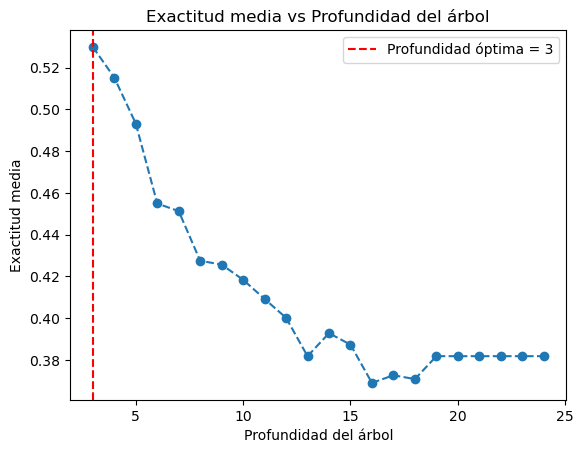

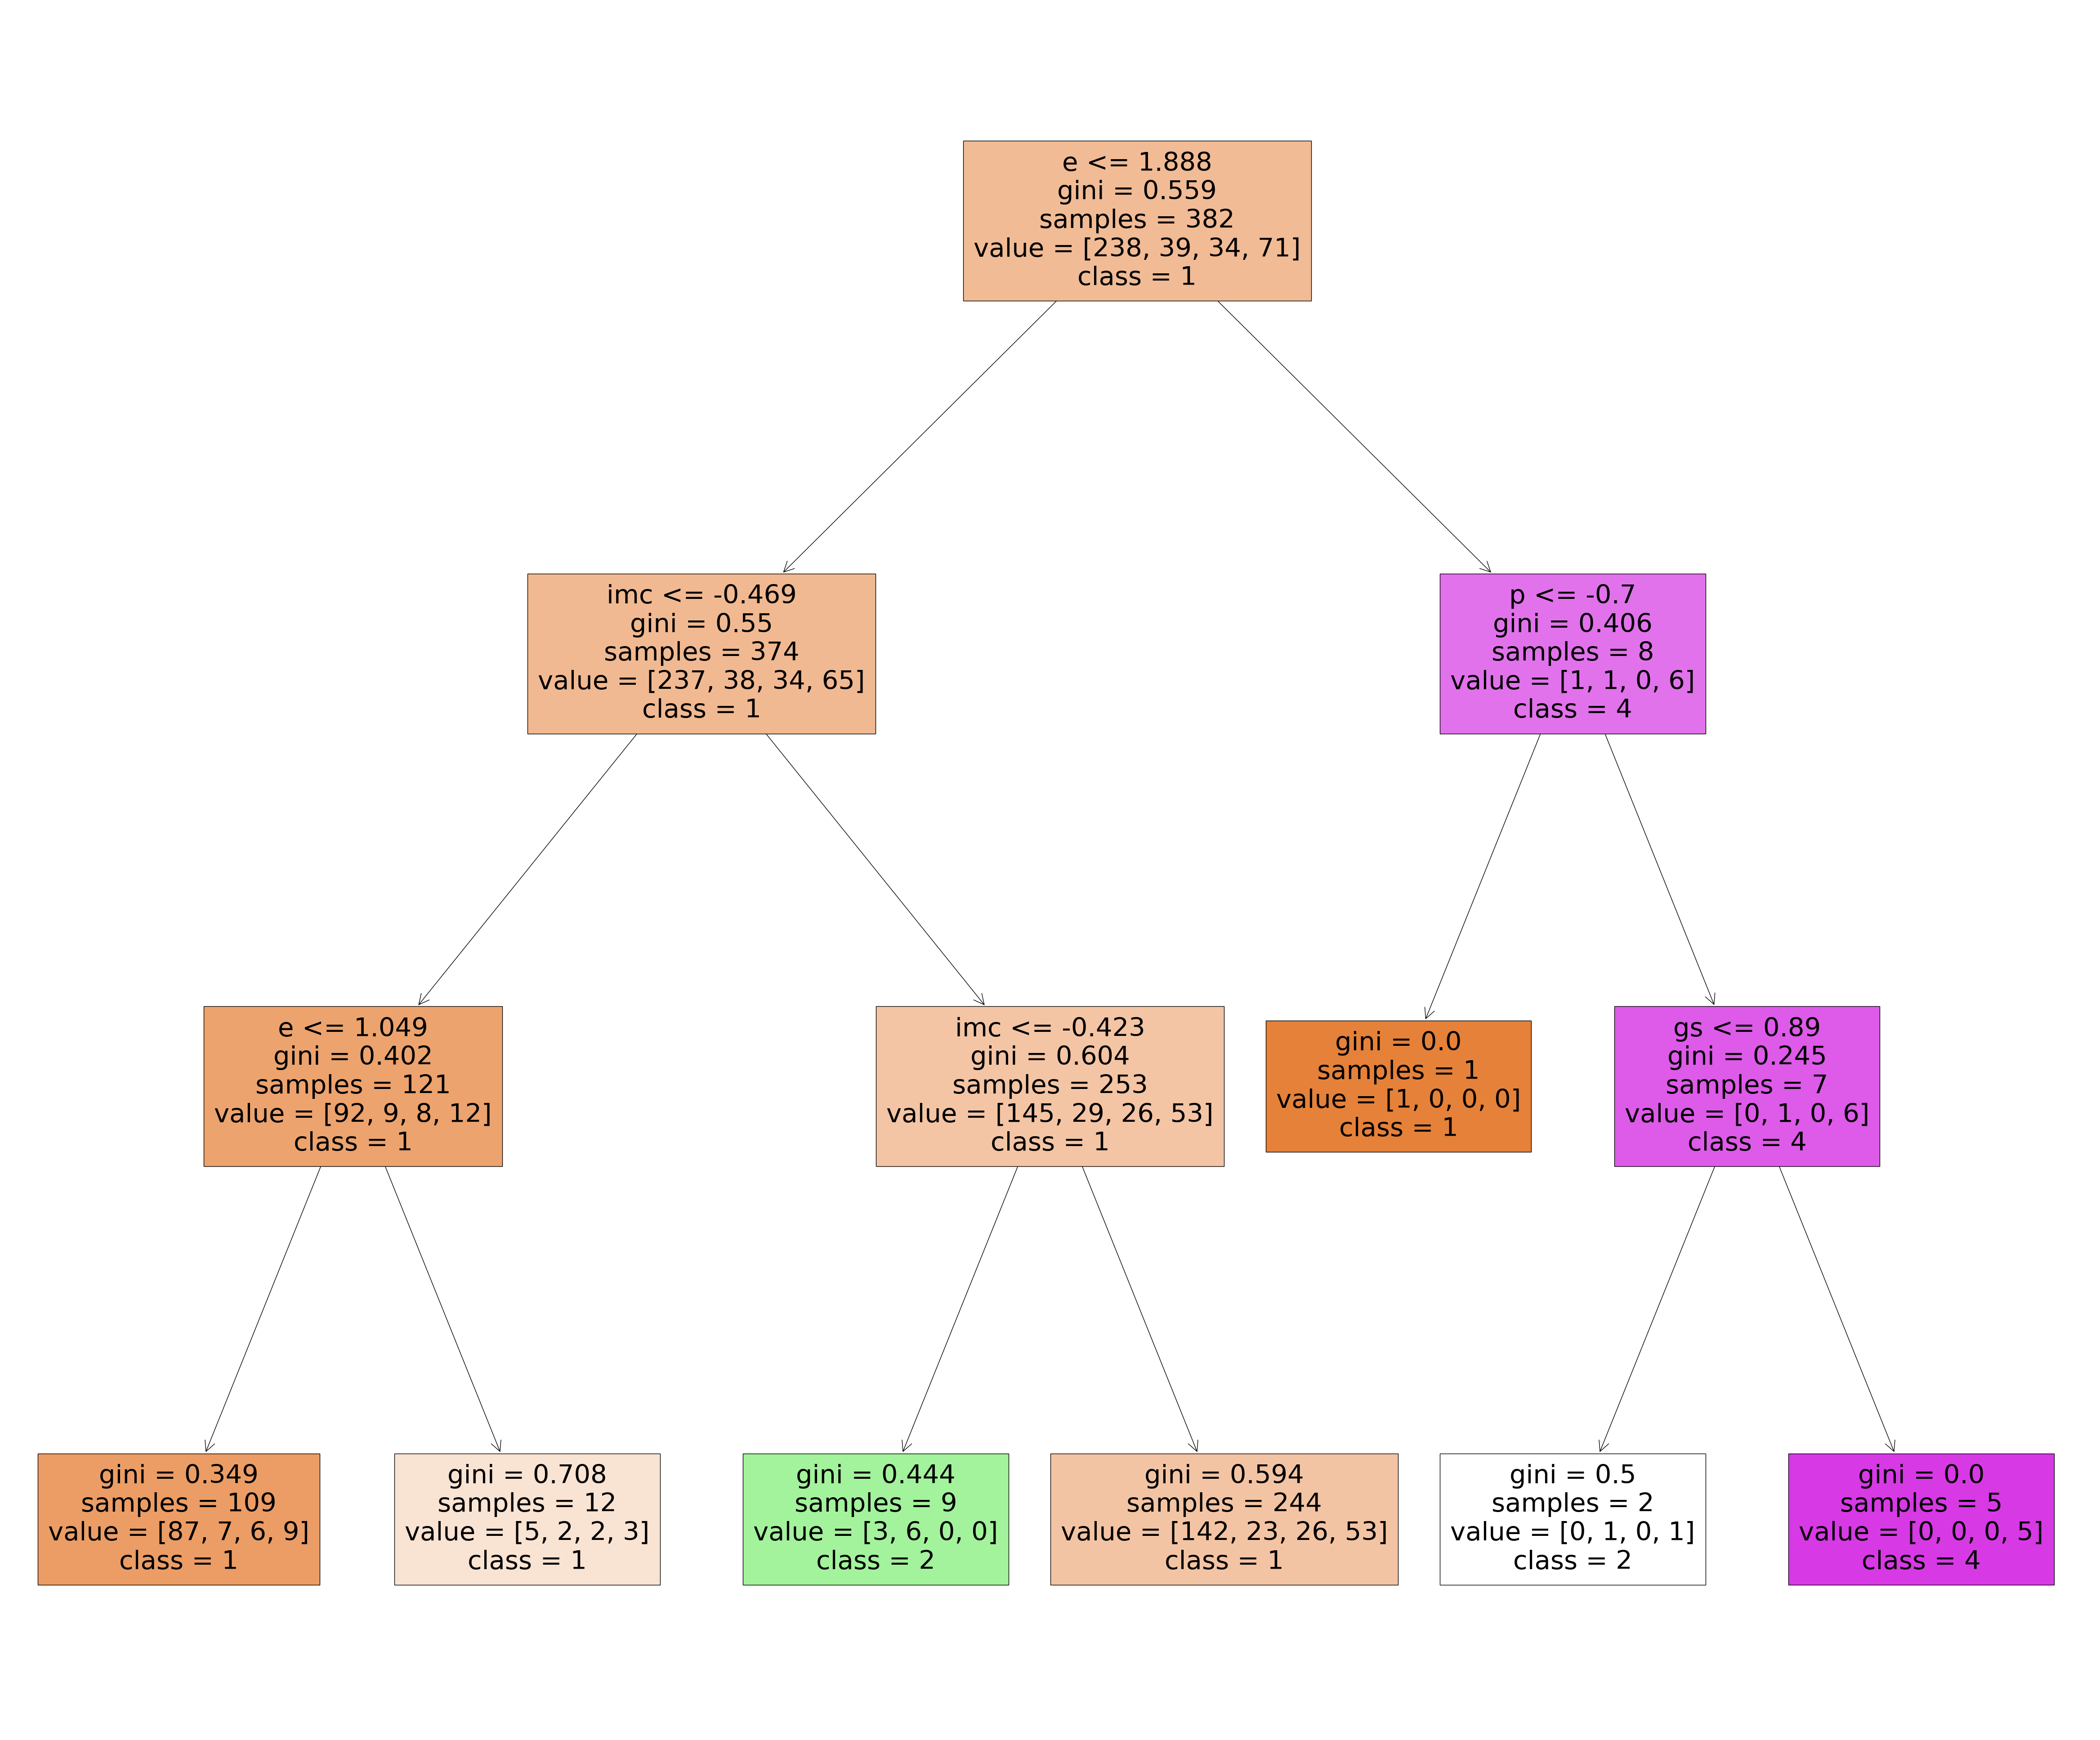

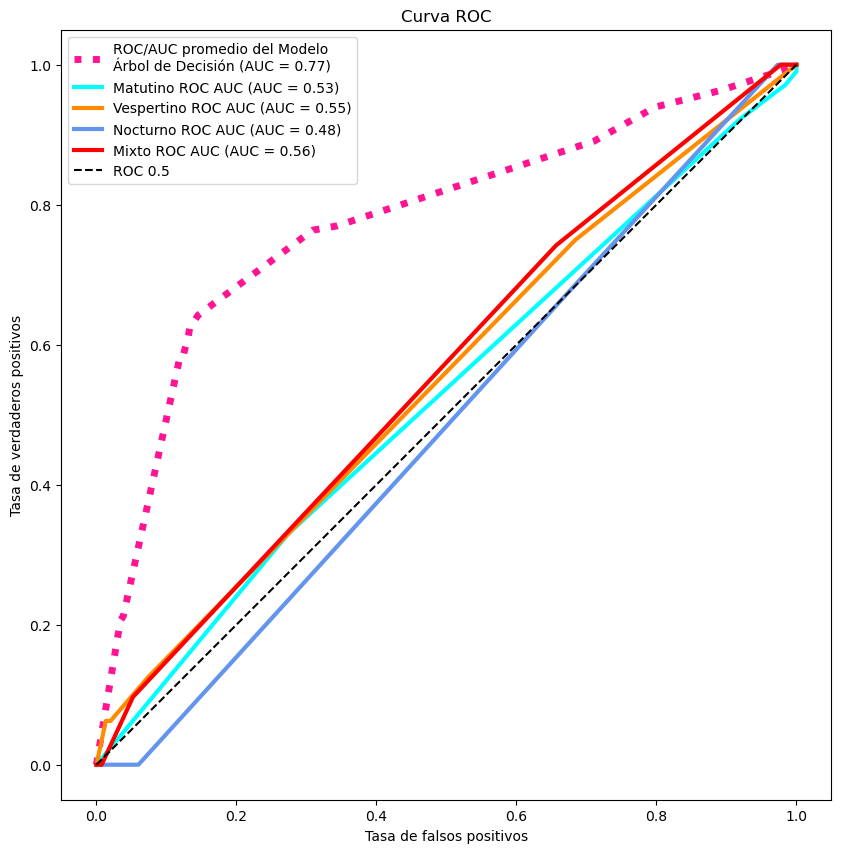

In [305]:
# Evaluamos diferentes profundidades del árbol de decisión
depths = list(range(3, 25))
media_exactitud_profundidad = []
for depth in depths:
    arbolu= DecisionTreeClassifier(max_depth = depth, random_state = arreglo_aleatorio[0])
    arbolu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_arbolu = arbolu.predict(X_prueba)
    score_arbolu = cross_val_score(arbolu, X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_profundidad.append(score_arbolu.mean())

profundidad_optima_arbolu = depths[np.argmax(media_exactitud_profundidad)]

# Usamos la profundidad óptima y el arreglo aleatorio para entrenar 'arbolu'
arbolu = DecisionTreeClassifier(max_depth = profundidad_optima_arbolu, random_state = arreglo_aleatorio[0])
arbolu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_arbolu = arbolu.predict(X_prueba)
score_arbolu = cross_val_score(arbolu, X, y, cv = 5, scoring = 'accuracy')

# --------------------
# Evaluamos las métricas del modelo 'arbolu'
# --------------------

y_puntaje_arbolu = arbolu.fit(
    X_entrenamiento,
    y_entrenamiento
    ).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_arbolu = label_binarizer.transform(y_prueba_u)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_arbolu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

print(f'\ny_puntaje:\n{y_puntaje_arbolu[0:2,:]}')
print()
print(f'y_puntaje.ravel():\n{y_puntaje_arbolu[0:2,:].ravel()}')

# Métricas de evaluación
exactitud_arbolu = accuracy_score(y_prueba_u,
                                  y_prediccion_arbolu)
precision_arbolu = precision_score(y_prueba_u,
                                   y_prediccion_arbolu,
                                   average = 'weighted')
sensibilidad_arbolu = recall_score(y_prueba_u,
                                   y_prediccion_arbolu,
                                   average = 'weighted')
f1_arbolu = f1_score(y_prueba_u,
                     y_prediccion_arbolu,
                     average = 'weighted')
matriz_confusion_arbolu = confusion_matrix(y_prueba_u,
                                           y_prediccion_arbolu)
micro_roc_auc_ovr_arbolu = roc_auc_score(y_prueba_u, 
                                         y_puntaje_arbolu,
                                         multi_class = 'ovr',
                                         average = 'micro')

# Gráfica de la curva ROC
# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_arbolu, tpr_arbolu, roc_auc_arbolu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_arbolu['micro'], tpr_arbolu['micro'], _ = roc_curve(
    y_onehot_prueba_arbolu.ravel(), y_puntaje_arbolu.ravel())
roc_auc_arbolu['micro'] = auc(fpr_arbolu['micro'], tpr_arbolu['micro'])

print("\nProfundidad óptima del árbol de desición arbolu:", profundidad_optima_arbolu)
print("Exactitud de arbolu:", round(exactitud_arbolu, 2))
print("Precisión de arbolu:", round(precision_arbolu, 2))
print("Sensibilidad de arbolu:", round(sensibilidad_arbolu, 2))
print("Puntaje F1 de arbolu:", round(f1_arbolu, 2))
print("Micro ROC/AUC de arbolu:", round(micro_roc_auc_ovr_arbolu, 2))
print(f"\nROC/AUC del Modelo:\n{roc_auc_arbolu['micro']:.2f}")
print("\nMatriz de confusión de arbolu:\n", matriz_confusion_arbolu)

# --------------------
# Graficamos las métricas del modelo 'arbolu'
# --------------------
plt.figure()
plt.plot(depths, media_exactitud_profundidad, 'o--')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Profundidad del árbol')
plt.axvline(profundidad_optima_arbolu, color = 'r', linestyle = '--',
            label = f'Profundidad óptima = {profundidad_optima_arbolu}')
plt.legend()
plt.show()

# Gráfica del modelo de árbol de desición
plt.figure(figsize = (60, 50))
class_names = [str(cls) for cls in arbolu.classes_]
plot_tree(arbolu,feature_names = variables_predictoras, class_names = class_names, filled = True)
plt.show()

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_arbolu['micro'],
    tpr_arbolu['micro'],
    label=f"ROC/AUC promedio del Modelo \nÁrbol de Decisión (AUC = {roc_auc_arbolu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                          ['aqua', 'darkorange', 'cornflowerblue', 'red']):
    RocCurveDisplay.from_predictions(
        y_onehot_prueba_arbolu[:, id_clase],
        y_puntaje_arbolu[:, id_clase],
        name=f"{clase_nombres[id_clase]} ROC AUC", 
        color=color,
        linewidth=3,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [306]:
# Crear un DataFrame con los resultados
resultados_arbolu = pd.DataFrame({
    'Profundidad óptima': [profundidad_optima_arbolu],
    'Exactitud arbolu': [exactitud_arbolu],
    'Precisión arbolu': [precision_arbolu],
    'Sensibilidad arbolu': [sensibilidad_arbolu],
    'Puntaje F1 arbolu': [f1_arbolu],
    'ROC/AUC arbolu': [micro_roc_auc_ovr_arbolu]
})

# Exportar los resultados a un archivo excel
exportar_metricas_a_excel(resultados_arbolu, 'arbolu')

##### Bosque aleatorio

Estructura de la matriz: (165, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

y_puntaje:
[[0.75       0.01851852 0.02777778 0.2037037 ]
 [0.83333333 0.02314815 0.00925926 0.13425926]]

y_puntaje.ravel():
[0.75       0.01851852 0.02777778 0.2037037  0.83333333 0.02314815
 0.00925926 0.13425926]

Estimador óptimo del bosqueu: 108
Exactitud de bosqueu: 0.61
Precisión de bosqueu: 0.57
Sensibilidad de bosqueu: 0.61
Puntaje F1 de bosqueu: 0.55
Micro ROC/AUC de bosqueu: 0.77

ROC/AUC del Modelo:
0.77

Matriz de confusión de bosqueu:
 [[92  1  0 10]
 [13  0  0  3]
 [13  0  2  0]
 [22  2  0  7]]


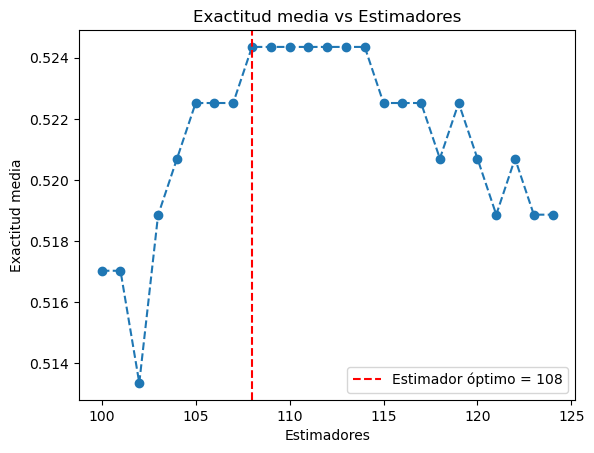

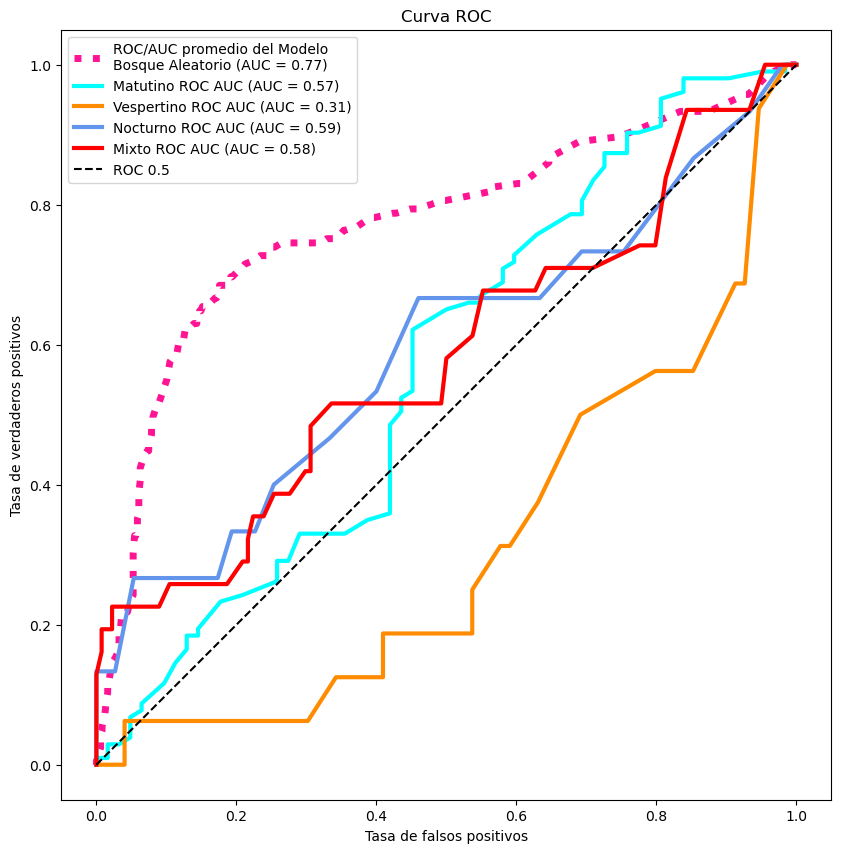

In [307]:
# Evaluamos diferentes valores de estimadores
estimadores = list(range(100, 125))
media_exactitud_estimadores = []
for estimador in estimadores:
    bosqueu = RandomForestClassifier(n_estimators = estimador, random_state = arreglo_aleatorio[0])
    bosqueu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_bosqueu = bosqueu.predict(X_prueba)
    score_bosqueu = cross_val_score(bosqueu, X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_estimadores.append(score_bosqueu.mean())

estimador_optimo_bosqueu = estimadores[np.argmax(media_exactitud_estimadores)]

# Usamos el estimador óptimo y el arreglo aleatorio para entrenar 'bosqueu'
bosqueu = RandomForestClassifier(n_estimators = estimador_optimo_bosqueu, random_state = arreglo_aleatorio[0])
bosqueu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_bosqueu = bosqueu.predict(X_prueba)
score_bosqueu = cross_val_score(bosqueu, X, y, cv = 5, scoring = 'accuracy')

# --------------------
# Evaluamos las métricas del modelo 'bosqueu'
# --------------------

y_puntaje_bosqueu = bosqueu.fit(
    X_entrenamiento,
    y_entrenamiento
    ).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_bosqueu = label_binarizer.transform(y_prueba_u)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_bosqueu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

print(f'\ny_puntaje:\n{y_puntaje_bosqueu[0:2,:]}')
print()
print(f'y_puntaje.ravel():\n{y_puntaje_bosqueu[0:2,:].ravel()}')

# Métricas de evaluación
exactitud_bosqueu = accuracy_score(y_prueba_u,
                                  y_prediccion_bosqueu)
precision_bosqueu = precision_score(y_prueba_u,
                                   y_prediccion_bosqueu,
                                   average = 'weighted')
sensibilidad_bosqueu = recall_score(y_prueba_u,
                                    y_prediccion_bosqueu,
                                    average = 'weighted')
f1_bosqueu = f1_score(y_prueba_u,
                      y_prediccion_bosqueu,
                      average = 'weighted')
matriz_confusion_bosqueu = confusion_matrix(y_prueba_u,
                                            y_prediccion_bosqueu)
micro_roc_auc_ovr_bosqueu = roc_auc_score(y_prueba_u,
                                          y_puntaje_bosqueu,
                                          multi_class = 'ovr',
                                          average = 'micro')

# Gráfica de la curva ROC
# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_bosqueu, tpr_bosqueu, roc_auc_bosqueu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_bosqueu['micro'], tpr_bosqueu['micro'], _ = roc_curve(
    y_onehot_prueba_bosqueu.ravel(), y_puntaje_bosqueu.ravel())
roc_auc_bosqueu['micro'] = auc(fpr_bosqueu['micro'], tpr_bosqueu['micro'])

print("\nEstimador óptimo del bosqueu:", estimador_optimo_bosqueu)
print("Exactitud de bosqueu:", round(exactitud_bosqueu, 2))
print("Precisión de bosqueu:", round(precision_bosqueu, 2))
print("Sensibilidad de bosqueu:", round(sensibilidad_bosqueu, 2))
print("Puntaje F1 de bosqueu:", round(f1_bosqueu, 2))
print("Micro ROC/AUC de bosqueu:", round(micro_roc_auc_ovr_bosqueu, 2))
print(f"\nROC/AUC del Modelo:\n{roc_auc_bosqueu['micro']:.2f}")
print("\nMatriz de confusión de bosqueu:\n", matriz_confusion_bosqueu)

# --------------------
# Graficamos las métricas del modelo 'bosqueu'
# --------------------
plt.figure()
plt.plot(estimadores, media_exactitud_estimadores, 'o--')
plt.xlabel('Estimadores')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Estimadores')
plt.axvline(estimador_optimo_bosqueu, color = 'r',
            linestyle = '--', label = f'Estimador óptimo = {estimador_optimo_bosqueu}')
plt.legend()
plt.show()

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_bosqueu['micro'],
    tpr_bosqueu['micro'],
    label=f"ROC/AUC promedio del Modelo \nBosque Aleatorio (AUC = {roc_auc_bosqueu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                            ['aqua', 'darkorange', 'cornflowerblue', 'red']):
        RocCurveDisplay.from_predictions(
            y_onehot_prueba_bosqueu[:, id_clase],
            y_puntaje_bosqueu[:, id_clase],
            name=f"{clase_nombres[id_clase]} ROC AUC", 
            color=color,
            linewidth=3,
            ax=ax,
        )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [308]:
# Crear un DataFrame con los resultados
resultados_bosqueu = pd.DataFrame({
    'Estimador óptimo': [estimador_optimo_bosqueu],
    'Exactitud bosqueu': [exactitud_bosqueu],
    'Precisión bosqueu': [precision_bosqueu],
    'Sensibilidad bosqueu': [sensibilidad_bosqueu],
    'Puntaje F1 bosqueu': [f1_bosqueu],
    'ROC/AUC bosqueu': [micro_roc_auc_ovr_bosqueu]
})

# Exportar los resultados a un archivo excel
exportar_metricas_a_excel(resultados_bosqueu, 'bosqueu')

##### KNN

Existen recomendaciones generales para realizar predicciones con el modelo KNN.
1.-La K siempre debe ser impar
2.-El número de vecinos cercanos desde el cúal podemos iniciar nuestro análisis debe ser mayor a 1 y menor que la raíz cuadrada del número de datos
3.-Debemos evaluar diferentes K para encontrar el de mejor rendimiento sin llegar al sobreajuste del modelo predictivo
4.-KNN no se comporta de manera adecuada cuando los datos son imbalanceados y cuando la elección de K es complicada, en estos casos se sugiere elegir otro modelo KNN
5.-Tener en cuenta Los siguientes puntos:
    5.1.-Normalización: como es una técnica basada en cálculos de distancias. Los datos siempre deben estar normalizados.
    5.2.-Numerizar: Los atributos categóricos deben ser convertidos a números.
    5.3.-Eliminar outliers: la técnica de KNN es sensible a valores extremos.
    5.4.-Selección de características: seleccionar aquellas que sean más relevantes para la variable objetivo. Regla 5.-No se comporta bien con datos imbalanceados y es dificil elegir la K

Estructura de la matriz: (165, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

y_puntaje:
[[0.81481481 0.07407407 0.03703704 0.07407407]
 [0.7037037  0.11111111 0.07407407 0.11111111]]

y_puntaje.ravel():
[0.81481481 0.07407407 0.03703704 0.07407407 0.7037037  0.11111111
 0.07407407 0.11111111]

K óptimo del knnu: 27
Exactitud de knnu: 0.62
Precisión de knnu: 0.39
Sensibilidad de knnu: 0.62
Puntaje F1 de knnu: 0.48
Micro ROC/AUC de knnu: 0.78

ROC/AUC del Modelo:
0.78

Matriz de confusión de knnu:
 [[103   0   0   0]
 [ 16   0   0   0]
 [ 15   0   0   0]
 [ 31   0   0   0]]


/Users/franciscodelgadoayala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


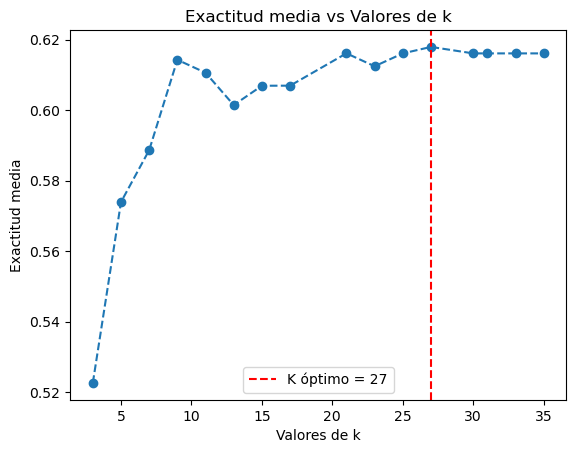

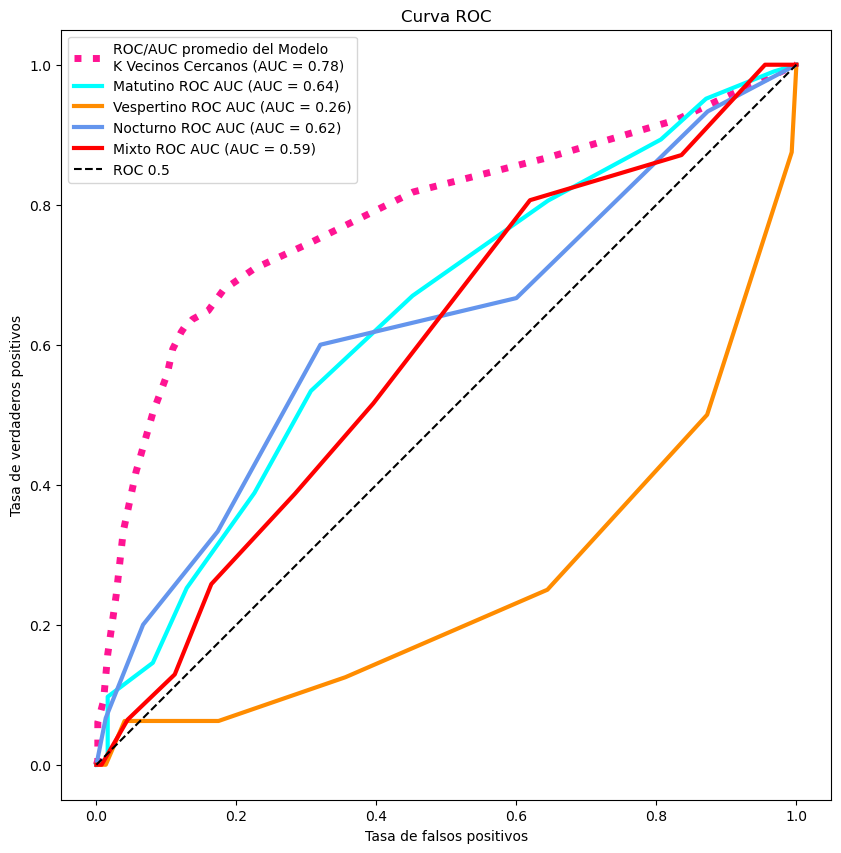

In [309]:
# Evaluamos diferentes valores de vecinos cercanos
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
media_exactitud_k = []
for k in valores_k:
    knnu = KNeighborsClassifier(n_neighbors = k)
    knnu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_knnu = knnu.predict(X_prueba)
    score_knnu = cross_val_score(knnu, X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_k.append(score_knnu.mean())

k_optimo_knnu = valores_k[np.argmax(media_exactitud_k)]

# Usamos el k óptimo para entrenar 'knnu'
knnu = KNeighborsClassifier(n_neighbors = k_optimo_knnu)
knnu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_knnu = knnu.predict(X_prueba)
score_knnu = cross_val_score(knnu, X, y, cv = 5, scoring = 'accuracy')

# --------------------
# Evaluamos las métricas del modelo 'knnu'
# --------------------

y_puntaje_knnu = knnu.fit(
    X_entrenamiento,
    y_entrenamiento
    ).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_knnu = label_binarizer.transform(y_prueba_u)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_knnu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

print(f'\ny_puntaje:\n{y_puntaje_knnu[0:2,:]}')
print()
print(f'y_puntaje.ravel():\n{y_puntaje_knnu[0:2,:].ravel()}')

# Métricas de evaluación
exactitud_knnu = accuracy_score(y_prueba_u,
                                y_prediccion_knnu)
precision_knnu = precision_score(y_prueba_u,
                                 y_prediccion_knnu,
                                 average = 'weighted')
sensibilidad_knnu = recall_score(y_prueba_u,
                                 y_prediccion_knnu,
                                 average = 'weighted')
f1_knnu = f1_score(y_prueba_u,
                   y_prediccion_knnu,
                   average = 'weighted')
matriz_confusion_knnu = confusion_matrix(y_prueba_u,
                                         y_prediccion_knnu)
micro_roc_auc_ovr_knnu = roc_auc_score(y_prueba_u,
                                       y_puntaje_knnu,
                                       multi_class = 'ovr',
                                       average = 'micro')

# Gráfica de la curva ROC
# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_knnu, tpr_knnu, roc_auc_knnu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_knnu['micro'], tpr_knnu['micro'], _ = roc_curve(
    y_onehot_prueba_knnu.ravel(), y_puntaje_knnu.ravel())
roc_auc_knnu['micro'] = auc(fpr_knnu['micro'], tpr_knnu['micro'])

print("\nK óptimo del knnu:", k_optimo_knnu)
print("Exactitud de knnu:", round(exactitud_knnu, 2))
print("Precisión de knnu:", round(precision_knnu, 2))
print("Sensibilidad de knnu:", round(sensibilidad_knnu, 2))
print("Puntaje F1 de knnu:", round(f1_knnu, 2))
print("Micro ROC/AUC de knnu:", round(micro_roc_auc_ovr_knnu, 2))
print(f"\nROC/AUC del Modelo:\n{roc_auc_knnu['micro']:.2f}")
print("\nMatriz de confusión de knnu:\n", matriz_confusion_knnu)

# --------------------
# Graficamos las métricas del modelo 'knnu'
# --------------------
plt.figure()
plt.plot(valores_k, media_exactitud_k, 'o--')
plt.xlabel('Valores de k')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Valores de k')
plt.axvline(k_optimo_knnu, color = 'r',
            linestyle = '--', label = f'K óptimo = {k_optimo_knnu}')
plt.legend()
plt.show()

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_knnu['micro'],
    tpr_knnu['micro'],
    label=f"ROC/AUC promedio del Modelo \nK Vecinos Cercanos (AUC = {roc_auc_knnu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                           ['aqua', 'darkorange', 'cornflowerblue', 'red']):
    RocCurveDisplay.from_predictions(
        y_onehot_prueba_knnu[:, id_clase],
        y_puntaje_knnu[:, id_clase],
        name=f"{clase_nombres[id_clase]} ROC AUC", 
        color=color,
        linewidth=3,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [310]:
resultados_knnu = pd.DataFrame({
    'K óptimo': [k_optimo_knnu],
    'Exactitud knnu': [exactitud_knnu],
    'Precisión knnu': [precision_knnu],
    'Sensibilidad knnu': [sensibilidad_knnu],
    'Puntaje F1 knnu': [f1_knnu],
    'ROC/AUC knnu': [micro_roc_auc_ovr_knnu]
})

# Exportar los resultados a un archivo excel
exportar_metricas_a_excel(resultados_knnu, 'knnu')

##### Elección del mejor modelo

In [311]:
# Creamos diccionarios para elegir el mejor modelo
modelosu = {
    'modelos_arbolu_diccionario': {
        'modelo': arbolu,
        'exactitud': exactitud_arbolu,
        'precision': precision_arbolu,
        'sensibilidad': sensibilidad_arbolu,
        'f1': f1_arbolu,
        'roc_auc': micro_roc_auc_ovr_arbolu
    },
    'modelos_bosqueu_diccionario': {
        'modelo': bosqueu,
        'exactitud': exactitud_bosqueu,
        'precision': precision_bosqueu,
        'sensibilidad': sensibilidad_bosqueu,
        'f1': f1_bosqueu,
        'roc_auc': micro_roc_auc_ovr_bosqueu
    },
    'modelos_knnu_diccionario': {
        'modelo': knnu,
        'exactitud': exactitud_knnu,
        'precision': precision_knnu,
        'sensibilidad': sensibilidad_knnu,
        'f1': f1_knnu,
        'roc_auc': micro_roc_auc_ovr_knnu
    }
}

# Accesamos a los diccionarios
arbolu_dict = modelosu['modelos_arbolu_diccionario']
bosqueu_dict = modelosu['modelos_bosqueu_diccionario']
knnu_dict = modelosu['modelos_knnu_diccionario']

# Comparamos la Exactitud, Precisión, Sensibilidad y F1 y ROC/AUC de los modelos
# --------------------
# Exactitud
# --------------------
if arbolu_dict['exactitud'] > bosqueu_dict['exactitud'] and arbolu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \narbolu ({arbolu_dict['exactitud']:.2f})")
elif bosqueu_dict['exactitud'] > arbolu_dict['exactitud'] and bosqueu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \nbosqueu ({bosqueu_dict['exactitud']:.2f})")
else:
    print(f"Mejor exactitud: \nknnu({knnu_dict['exactitud']:.2f})")

# --------------------
# Precisión
# --------------------
if arbolu_dict['precision'] > bosqueu_dict['precision'] and arbolu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precisión: \narbolu ({arbolu_dict['precision']:.2f})")
elif bosqueu_dict['precision'] > arbolu_dict['precision'] and bosqueu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precisión: \nbosqueu ({bosqueu_dict['precision']:.2f})")
else:
    print(f"Mejor precisión: \nknnu({knnu_dict['precision']:.2f})")

# --------------------
# Sensibilidad
# --------------------
if arbolu_dict['sensibilidad'] > bosqueu_dict['sensibilidad'] and arbolu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \narbolu ({arbolu_dict['sensibilidad']:.2f})")
elif bosqueu_dict['sensibilidad'] > arbolu_dict['sensibilidad'] and bosqueu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \nbosqueu ({bosqueu_dict['sensibilidad']:.2f})")
else:
    print(f"Mejor sensibilidad: \nknnu({knnu_dict['sensibilidad']:.2f})")
# --------------------
# F1
# --------------------
if arbolu_dict['f1'] > bosqueu_dict['f1'] and arbolu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \narbolu ({arbolu_dict['f1']:.2f})")
elif bosqueu_dict['f1'] > arbolu_dict['f1'] and bosqueu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \nbosqueu ({bosqueu_dict['f1']:.2f})")
else:
    print(f"Mejor f1: \nknnu({knnu_dict['f1']:.2f})")

# --------------------
# ROC/AUC
# --------------------
if arbolu_dict['roc_auc'] > bosqueu_dict['roc_auc'] and arbolu_dict['roc_auc'] > knnu_dict['roc_auc']:
    print(f"Mejor ROC/AUC: \narbolu ({arbolu_dict['roc_auc']:.2f})")
elif bosqueu_dict['roc_auc'] > arbolu_dict['roc_auc'] and bosqueu_dict['roc_auc'] > knnu_dict['roc_auc']:
    print(f"Mejor ROC/AUC: \nbosqueu ({bosqueu_dict['roc_auc']:.2f})")
else:
    print(f"Mejor ROC/AUC: \nknnu({knnu_dict['roc_auc']:.2f})")

# Creamos una lista de tuplas con el nombre de los modelos y los valores de las métricas principales
eleccion_modelou = [('arbolu',
                    arbolu_dict['exactitud'],
                    arbolu_dict['precision'],
                    arbolu_dict['sensibilidad'],
                    arbolu_dict['f1'],
                    arbolu_dict['roc_auc']),
                    ('bosqueu',
                    bosqueu_dict['exactitud'],
                    bosqueu_dict['precision'],
                    bosqueu_dict['sensibilidad'],
                    bosqueu_dict['f1'],
                    bosqueu_dict['roc_auc']),
                    ('knnu',
                    knnu_dict['exactitud'],
                    knnu_dict['precision'],
                    knnu_dict['sensibilidad'],
                    knnu_dict['f1'],
                    knnu_dict['roc_auc'])]

# Ordenamos la lista en orden descendente por el valor de exactitud, precision,
# sensibilidad, f1 y roc_auc
eleccion_modelou.sort(key = lambda x:
                      (x[1], x[2], x[3], x[4], x[5]), reverse = True)

# Seleccionamos el primer elemento de la lista como el mejor modelo
mejor_modelou = eleccion_modelou[0][0]

print(f"\nEl mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: {mejor_modelou}")

Mejor exactitud: 
knnu(0.62)
Mejor precisión: 
bosqueu (0.57)
Mejor sensibilidad: 
knnu(0.62)
Mejor f1: 
bosqueu (0.55)
Mejor ROC/AUC: 
knnu(0.78)

El mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: knnu


In [312]:
## PRUEBA ##
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelou_obj = modelosu[f"modelos_{mejor_modelou}_diccionario"]['modelo']

prediccion_perdidosu = mejor_modelou_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo df con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosu
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imu = desestandarizar_columnas(
    datos_completos,
    columnas_a_estandarizar,
    medias_columnas,
    desviaciones_columnas
)

exportar_imputados_a_excel(df_imu, 'turno')
# df_imu significa DataFrame Imputados Modelo U Turno

# --------------------
# Estandarizamos df_imu y lo convertimos a 'df_imue' para ingresar al modelo de tensio_sistolica
# --------------------
# Paso 1: Copiamos los df
df_imue = df_imu.copy() # df_imue significa DataFrame Imputados Modelo U Estandarizado
# Paso 2: Convertimos las variables categóricas a numéricas
df_imue['s'] = df_imue['s'].astype(float)
df_imue['u'] = df_imue['u'].astype(float)
# Paso3: Estandarizamos df_imue
df_imue = estandarizar_todas_columnas(
    df_imue,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

/var/folders/28/0lfytjkn0870ys5gfs8vhl_m0000gn/T/ipykernel_12079/3249308635.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosu


### Métodos de Regresión

#### Variable "ts" (Tensión Sistólica)

In [313]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas 
# y excluidas del modelo
columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imue.copy() # df_imue = dataframe imputados modelo u estandarizado
datos = df_imue[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'ts'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['td', 'cc', 'cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

In [314]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba_ts = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = arreglo_aleatorio[0],
    )

##### Arból de decisión

In [315]:
depths = list(range(3, 25))
r2_profundidad_ts = []
for depth in depths:
    arbolts = DecisionTreeRegressor(max_depth = depth, random_state = arreglo_aleatorio[0])
    arbolts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_arbolts = arbolts.predict(X_prueba)
    score_arbolts = r2_score(y_prueba_ts, y_prediccion_arbolts)
    r2_profundidad_ts.append(score_arbolts)

profundidad_optima_arbolts = depths[np.argmax(r2_profundidad_ts)]

# --------------------
# Evaluamos las métricas del modelo 'arbolts'
# --------------------
mae_arbolts = mean_absolute_error(y_prueba_ts, y_prediccion_arbolts)
mse_arbolts = mean_squared_error(y_prueba_ts, y_prediccion_arbolts)
rmse_arbolts = np.sqrt(mse_arbolts)
r2_arbolts = r2_score(y_prueba_ts, y_prediccion_arbolts)

print("Profundidad óptima del árbol de desición arbolts:", profundidad_optima_arbolts)
print("Error absoluto medio de arbolts:", round(mae_arbolts, 2))
print("Error cuadrático medio de arbolts:", round(mse_arbolts, 2))
print("Raíz del error cuadrático medio de arbolts:", round(rmse_arbolts, 2))
print("R-cuadrado de arbolts:", round((r2_arbolts), 2))

Profundidad óptima del árbol de desición arbolts: 3
Error absoluto medio de arbolts: 0.89
Error cuadrático medio de arbolts: 1.4
Raíz del error cuadrático medio de arbolts: 1.18
R-cuadrado de arbolts: -0.69


In [316]:
resultados_arbolts = pd.DataFrame({
    # Hiperparámetro, RMSE, MAE, R2 y MSE
    'Profundidad óptima': [profundidad_optima_arbolts],
    'RMSE arbolts': [rmse_arbolts],
    'MAE arbolts': [mae_arbolts],
    'R2 arbolts': [r2_arbolts],
    'MSE arbolts': [mse_arbolts]
})

exportar_metricas_a_excel(resultados_arbolts, 'arbolts')

##### Bosque aleatorio

In [317]:
estimadores = list(range(100, 125))
r2_estimadores_ts = []
for estimador in estimadores:
    bosquets = RandomForestRegressor(n_estimators = estimador, random_state = arreglo_aleatorio[0])
    bosquets.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_bosquets = bosquets.predict(X_prueba)
    score_bosquets = r2_score(y_prueba_ts, y_prediccion_bosquets)
    r2_estimadores_ts.append(score_bosquets)

estimador_optimo_bosquets = estimadores[np.argmax(r2_estimadores_ts)]

mae_bosquets = mean_absolute_error(y_prueba_ts, y_prediccion_bosquets)
mse_bosquets = mean_squared_error(y_prueba_ts, y_prediccion_bosquets)
rmse_bosquets = np.sqrt(mse_bosquets)
r2_bosquets = r2_score(y_prueba_ts, y_prediccion_bosquets)

print("Estimador óptimo del bosquets:", estimador_optimo_bosquets)
print("Raíz del error cuadrático medio de bosquets:", round(rmse_bosquets, 2))
print("Error absoluto medio de bosquets:", round(mae_bosquets, 2))
print("R-cuadrado de bosquets:", round((r2_bosquets), 2))
print("Error cuadrático medio de bosquets:", round(mse_bosquets, 2))

Estimador óptimo del bosquets: 123
Raíz del error cuadrático medio de bosquets: 0.8
Error absoluto medio de bosquets: 0.63
R-cuadrado de bosquets: 0.22
Error cuadrático medio de bosquets: 0.65


In [318]:
resultados_bosquets = pd.DataFrame({
    'Estimador óptimo': [estimador_optimo_bosquets],
    'RMSE bosquets': [rmse_bosquets],
    'MAE bosquets': [mae_bosquets],
    'R2 bosquets': [r2_bosquets],
    'MSE bosquets': [mse_bosquets]
})

exportar_metricas_a_excel(resultados_bosquets, 'bosquets')

##### KNN

In [319]:
k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_ts = []
for valores_k in k:
    knnts = KNeighborsRegressor(n_neighbors = valores_k)
    knnts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_knnts = knnts.predict(X_prueba)
    score_knnts = r2_score(y_prueba_ts, y_prediccion_knnts)
    r2_k_ts.append(score_knnts)

k_optimo_knnts = k[np.argmax(r2_k_ts)]

mae_knnts = mean_absolute_error(y_prueba_ts, y_prediccion_knnts)
mse_knnts = mean_squared_error(y_prueba_ts, y_prediccion_knnts)
rmse_knnts = np.sqrt(mse_knnts)
r2_knnts = r2_score(y_prueba_ts, y_prediccion_knnts)

print("K óptimo de knnts:", k_optimo_knnts)
print("Error absoluto medio de knnts:", round(mae_knnts, 2))
print("Error cuadrático medio de knnts:", round(mse_knnts, 2))
print("Raíz del error cuadrático medio de knnts:", round(rmse_knnts, 2))
print("R-cuadrado de knnts:", round((r2_knnts), 2))

K óptimo de knnts: 23
Error absoluto medio de knnts: 0.65
Error cuadrático medio de knnts: 0.71
Raíz del error cuadrático medio de knnts: 0.84
R-cuadrado de knnts: 0.15


In [320]:
resultados_knnts = pd.DataFrame({
    'K óptimo': [k_optimo_knnts],
    'RMSE knnts': [rmse_knnts],
    'MAE knnts': [mae_knnts],
    'R2 knnts': [r2_knnts],
    'MSE knnts': [mse_knnts]
})

exportar_metricas_a_excel(resultados_knnts, 'knnts')

##### Elección del mejor modelo

In [321]:
modelosts = {
    'arbolts': {
        'modelo': arbolts,
        'mae': mae_arbolts,
        'mse': mse_arbolts,
        'rmse': rmse_arbolts,
        'r2': r2_arbolts,
        'prediccion': y_prediccion_arbolts
    },
    'bosquets': {
        'modelo': bosquets,
        'mae': mae_bosquets,
        'mse': mse_bosquets,
        'rmse': rmse_bosquets,
        'r2': r2_bosquets,
        'prediccion': y_prediccion_bosquets
    },
    'knnts': {
        'modelo': knnts,
        'mae': mae_knnts,
        'mse': mse_knnts,
        'rmse': rmse_knnts,
        'r2': r2_knnts,
        'prediccion': y_prediccion_knnts
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_ts = min(modelosts, key = lambda x: modelosts[x][metrica] 
                          if metrica != 'r2' 
                          else -modelosts[x][metrica])
    mejor_resultados = modelosts[mejor_modelo_ts][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_ts} ({mejor_resultados:.2f})")

# Basado en todas las métricas, seleccionamos el mejor modelo para predicción de tensión sistólica
mejor_modelogeneral_ts = max(
    modelosts,
    key = lambda x: (
        -modelosts[x]['rmse'],
        -modelosts[x]['mae'],
        modelosts[x]['r2'],
        -modelosts[x]['mse']
    )
)

print(f"\nEl mejor modelo para la predicción de tensión sistólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelogeneral_ts}")

# Obteniendo las predicciones del mejor modelo general
y_prediccion_mejor_modelo = modelosts[mejor_modelogeneral_ts]['prediccion']

# Preparación de los Datos para Visualización
datos_ts = pd.DataFrame({
    'y_prueba_ts': y_prueba_ts,
    'prediccion_arbolts': modelosts['arbolts']['prediccion'],
    'prediccion_bosquets': modelosts['bosquets']['prediccion'],
    'prediccion_knnts': modelosts['knnts']['prediccion']
})

# Si el mejor modelo no está en las columnas anteriores, agregarlo
if mejor_modelogeneral_ts not in datos_ts.columns:
    datos_ts[f'prediccion_{mejor_modelogeneral_ts}'] = y_prediccion_mejor_modelo

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquets (0.80)
Mejor Error Absoluto Medio (mae): 
 bosquets (0.63)
Mejor R-cuadrado (r2): 
 bosquets (0.22)
Mejor Error Cuadrático Medio (mse): 
 bosquets (0.65)

El mejor modelo para la predicción de tensión sistólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquets


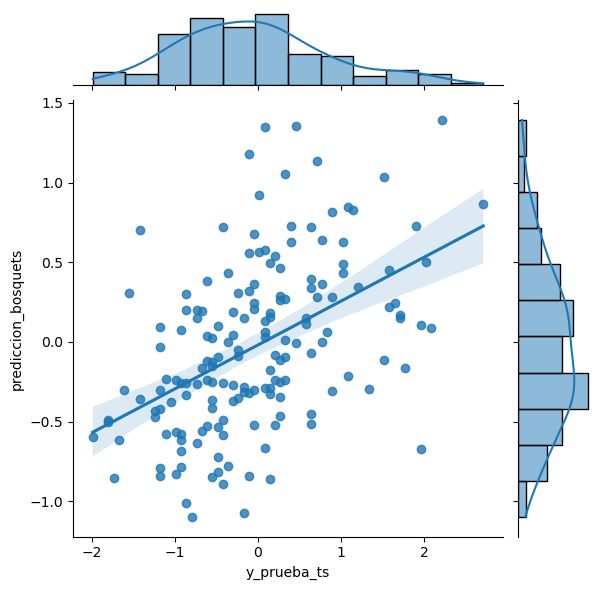

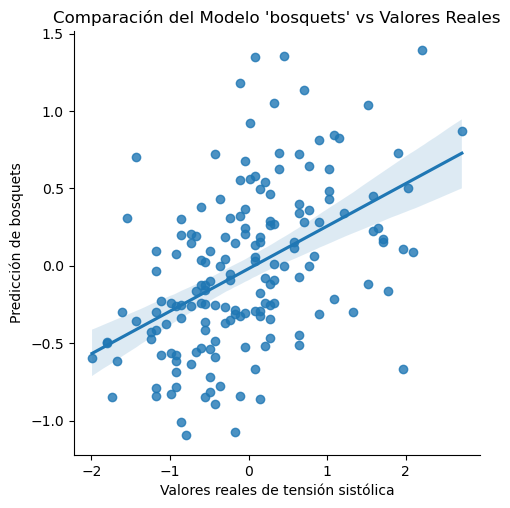

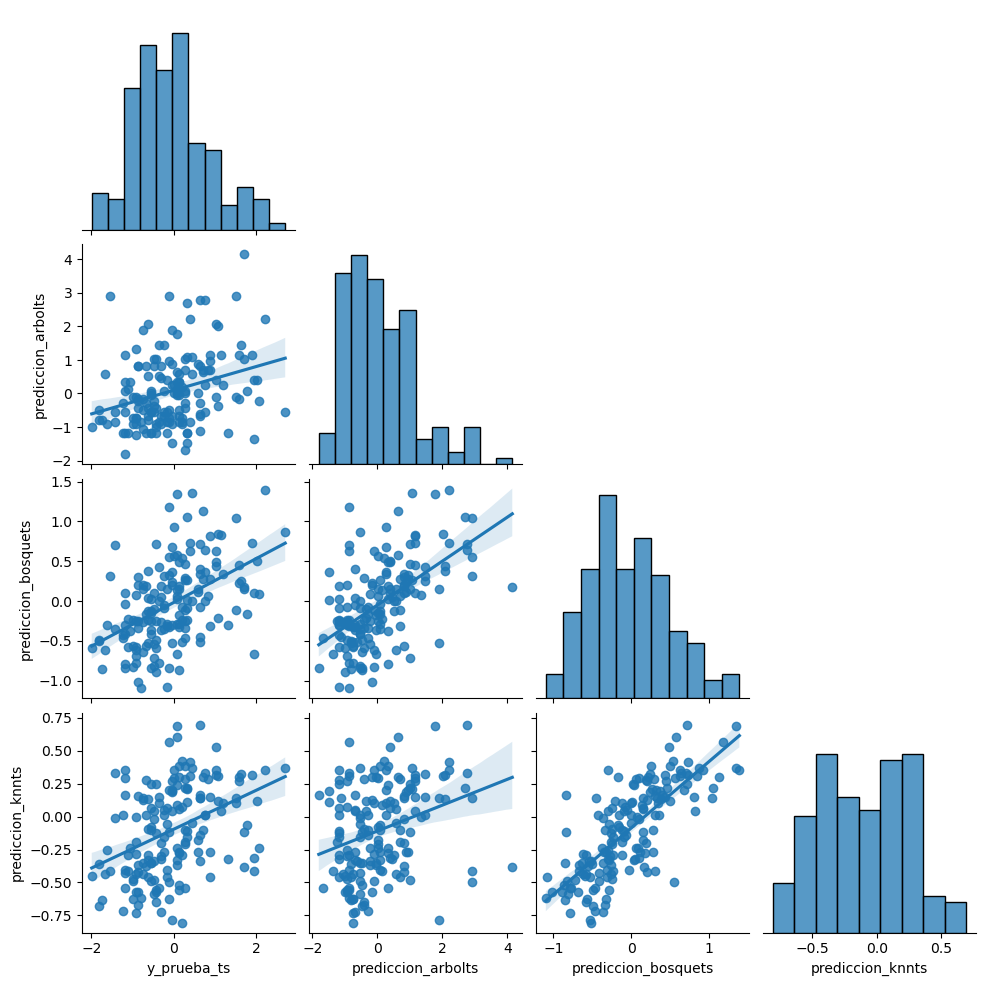

In [322]:
# Jointplot para el Mejor Modelo
sns.jointplot(
    x = 'y_prueba_ts',
    y = f'prediccion_{mejor_modelogeneral_ts}',
    data = datos_ts,
    kind = 'reg'
)
# Lmplot para el Mejor Modelo
sns.lmplot(
    x = 'y_prueba_ts',
    y = f'prediccion_{mejor_modelogeneral_ts}',
    data = datos_ts
)
plt.title(f"Comparación del Modelo '{mejor_modelogeneral_ts}' vs Valores Reales")
plt.xlabel('Valores reales de tensión sistólica')
plt.ylabel(f'Predicción de {mejor_modelogeneral_ts}')
plt.show()

# Pairplot para todos los modelos
sns.pairplot(datos_ts, corner = True, kind = 'reg')
plt.show()

In [323]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelots_obj = modelosts[mejor_modelogeneral_ts]['modelo']

prediccion_perdidosts = mejor_modelots_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosts
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imts = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imts, 'tension_sistolica')
# df_imts = Dataframe Imputados Modelo TS 'Tensión Sistólica'

# -------------------- #
# Estandarizamos df_imts (en df_imtse) para ingresar al modelo de Tensión Diastólica (td)
# -------------------- #
# Paso 1. Copiamos los dataframes
df_imtse = df_imts.copy() # df_imtse = Dataframe Imputados Modelo TS Estandarizado
# Paso 2. Estandarizamos df_imtse
df_imtse = estandarizar_todas_columnas(
    df_imtse,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "td" (Tensión Diastólica)

In [324]:
columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imtse.copy()
datos = df_imtse[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'td'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['cc', 'cct', 'pp']]

datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

In [325]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba_td = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = arreglo_aleatorio[0],
    )

##### Arból de decisión

In [326]:
depths = list(range(3, 25))
r2_profundidad_td = []
for depth in depths:
    arboltd = DecisionTreeRegressor(max_depth = depth, random_state = arreglo_aleatorio[0])
    arboltd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_arboltd = arboltd.predict(X_prueba)
    score_arboltd = r2_score(y_prueba_td, y_prediccion_arboltd)
    r2_profundidad_td.append(score_arboltd)

profundidad_optima_arboltd = depths[np.argmax(r2_profundidad_td)]

mae_arboltd = mean_absolute_error(y_prueba_td, y_prediccion_arboltd)
mse_arboltd = mean_squared_error(y_prueba_td, y_prediccion_arboltd)
rmse_arboltd = np.sqrt(mse_arboltd)
r2_arboltd = r2_score(y_prueba_td, y_prediccion_arboltd)

print("Profundidad óptima del árbol de desición arboltd:", profundidad_optima_arboltd)
print("Error absoluto medio de arboltd:", round(mae_arboltd, 2))
print("Error cuadrático medio de arboltd:", round(mse_arboltd, 2))
print("Raíz del error cuadrático medio de arboltd:", round(rmse_arboltd, 2))
print("R-cuadrado de arboltd:", round((r2_arboltd), 2))

Profundidad óptima del árbol de desición arboltd: 3
Error absoluto medio de arboltd: 0.68
Error cuadrático medio de arboltd: 0.76
Raíz del error cuadrático medio de arboltd: 0.87
R-cuadrado de arboltd: 0.3


In [327]:
resultados_arboltd = pd.DataFrame({
    'Profundidad óptima': [profundidad_optima_arboltd],
    'RMSE arboltd': [rmse_arboltd],
    'MAE arboltd': [mae_arboltd],
    'R2 arboltd': [r2_arboltd],
    'MSE arboltd': [mse_arboltd]
})

exportar_metricas_a_excel(resultados_arboltd, 'arboltd')

##### Bosque aleatorio

In [328]:
estimadores = list(range(100, 125))
r2_estimadores_td = []
for estimador in estimadores:
    bosquetd = RandomForestRegressor(n_estimators = estimador, random_state = arreglo_aleatorio[0])
    bosquetd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_bosquetd = bosquetd.predict(X_prueba)
    score_bosquetd = r2_score(y_prueba_td, y_prediccion_bosquetd)
    r2_estimadores_td.append(score_bosquetd)

estimador_optimo_bosquetd = estimadores[np.argmax(r2_estimadores_td)]

mae_bosquetd = mean_absolute_error(y_prueba_td, y_prediccion_bosquetd)
mse_bosquetd = mean_squared_error(y_prueba_td, y_prediccion_bosquetd)
rmse_bosquetd = np.sqrt(mse_bosquetd)
r2_bosquetd = r2_score(y_prueba_td, y_prediccion_bosquetd)

print("Estimador óptimo del bosquetd:", estimador_optimo_bosquetd)
print("Error absoluto medio de bosquetd:", round(mae_bosquetd, 2))
print("Error cuadrático medio de bosquetd:", round(mse_bosquetd, 2))
print("Raíz del error cuadrático medio de bosquetd:", round(rmse_bosquetd, 2))
print("R-cuadrado de bosquetd:", round((r2_bosquetd), 2))

Estimador óptimo del bosquetd: 122
Error absoluto medio de bosquetd: 0.46
Error cuadrático medio de bosquetd: 0.41
Raíz del error cuadrático medio de bosquetd: 0.64
R-cuadrado de bosquetd: 0.62


In [329]:
resultados_bosquetd = pd.DataFrame({
    'Estimador óptimo': [estimador_optimo_bosquetd],
    'RMSE bosquetd': [rmse_bosquetd],
    'MAE bosquetd': [mae_bosquetd],
    'R2 bosquetd': [r2_bosquetd],
    'MSE bosquetd': [mse_bosquetd]
})

exportar_metricas_a_excel(resultados_bosquetd, 'bosquetd')

##### KNN

In [330]:
k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_td = []
for valores_k in k:
    knntd = KNeighborsRegressor(n_neighbors = valores_k)
    knntd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_knntd = knntd.predict(X_prueba)
    score_knntd = r2_score(y_prueba_td, y_prediccion_knntd)
    r2_k_td.append(score_knntd)

k_optimo_knntd = k[np.argmax(r2_k_td)]

mae_knntd = mean_absolute_error(y_prueba_td, y_prediccion_knntd)
mse_knntd = mean_squared_error(y_prueba_td, y_prediccion_knntd)
rmse_knntd = np.sqrt(mse_knntd)
r2_knntd = r2_score(y_prueba_td, y_prediccion_knntd)

print("K óptimo de knntd:", k_optimo_knntd)
print("Error absoluto medio de knntd:", round(mae_knntd, 2))
print("Error cuadrático medio de knntd:", round(mse_knntd, 2))
print("Raíz del error cuadrático medio de knntd:", round(rmse_knntd, 2))
print("R-cuadrado de knntd:", round((r2_knntd), 2))

K óptimo de knntd: 15
Error absoluto medio de knntd: 0.62
Error cuadrático medio de knntd: 0.68
Raíz del error cuadrático medio de knntd: 0.83
R-cuadrado de knntd: 0.37


In [331]:
resultados_knntd = pd.DataFrame({
    'K óptimo': [k_optimo_knntd],
    'RMSE knntd': [rmse_knntd],
    'MAE knntd': [mae_knntd],
    'R2 knntd': [r2_knntd],
    'MSE knntd': [mse_knntd]
})

exportar_metricas_a_excel(resultados_knntd, 'knntd')

##### Elección del mejor modelo

In [332]:
modelostd = {
    'arboltd': {
        'modelo': arboltd,
        'mae': mae_arboltd,
        'mse': mse_arboltd,
        'rmse': rmse_arboltd,
        'r2': r2_arboltd,
        'prediccion': y_prediccion_arboltd
    },
    'bosquetd': {
        'modelo': bosquetd,
        'mae': mae_bosquetd,
        'mse': mse_bosquetd,
        'rmse': rmse_bosquetd,
        'r2': r2_bosquetd,
        'prediccion': y_prediccion_bosquetd
    },
    'knntd': {
        'modelo': knntd,
        'mae': mae_knntd,
        'mse': mse_knntd,
        'rmse': rmse_knntd,
        'r2': r2_knntd,
        'prediccion': y_prediccion_knntd
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_td = min(modelostd, key = lambda x: modelostd[x][metrica] 
                          if metrica != 'r2' 
                          else -modelostd[x][metrica])
    mejor_resultados = modelostd[mejor_modelo_td][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_td} ({mejor_resultados:.2f})")

mejor_modelogeneral_td = max(
    modelostd,
    key = lambda x: (
        -modelostd[x]['rmse'],
        -modelostd[x]['mae'],
        modelostd[x]['r2'],
        -modelostd[x]['mse']
    )
)

print(f"\nEl mejor modelo para la predicción de tensión diastólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelogeneral_td}")

y_prediccion_mejor_modelo = modelostd[mejor_modelogeneral_td]['prediccion']

datos_td = pd.DataFrame({
    'y_prueba_td': y_prueba_td,
    'prediccion_arboltd': modelostd['arboltd']['prediccion'],
    'prediccion_bosquetd': modelostd['bosquetd']['prediccion'],
    'prediccion_knntd': modelostd['knntd']['prediccion']
})

if mejor_modelogeneral_td not in datos_td.columns:
    datos_td[f'prediccion_{mejor_modelogeneral_td}'] = y_prediccion_mejor_modelo

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquetd (0.64)
Mejor Error Absoluto Medio (mae): 
 bosquetd (0.46)
Mejor R-cuadrado (r2): 
 bosquetd (0.62)
Mejor Error Cuadrático Medio (mse): 
 bosquetd (0.41)

El mejor modelo para la predicción de tensión diastólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquetd


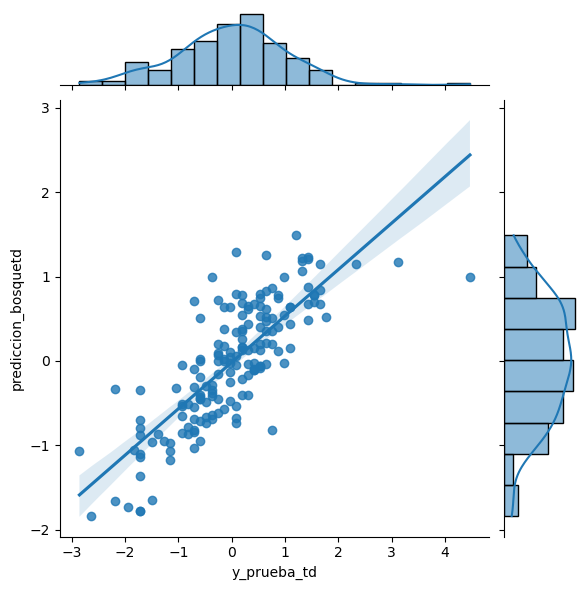

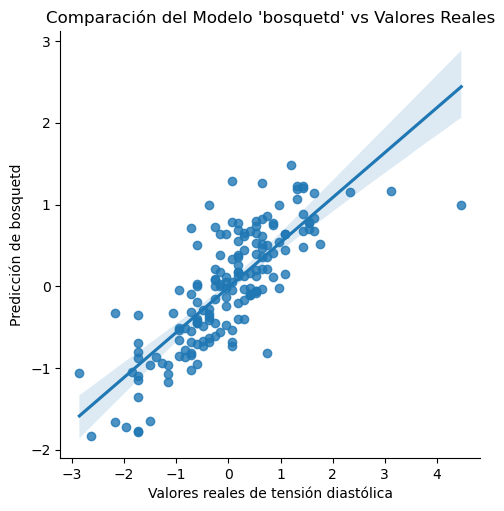

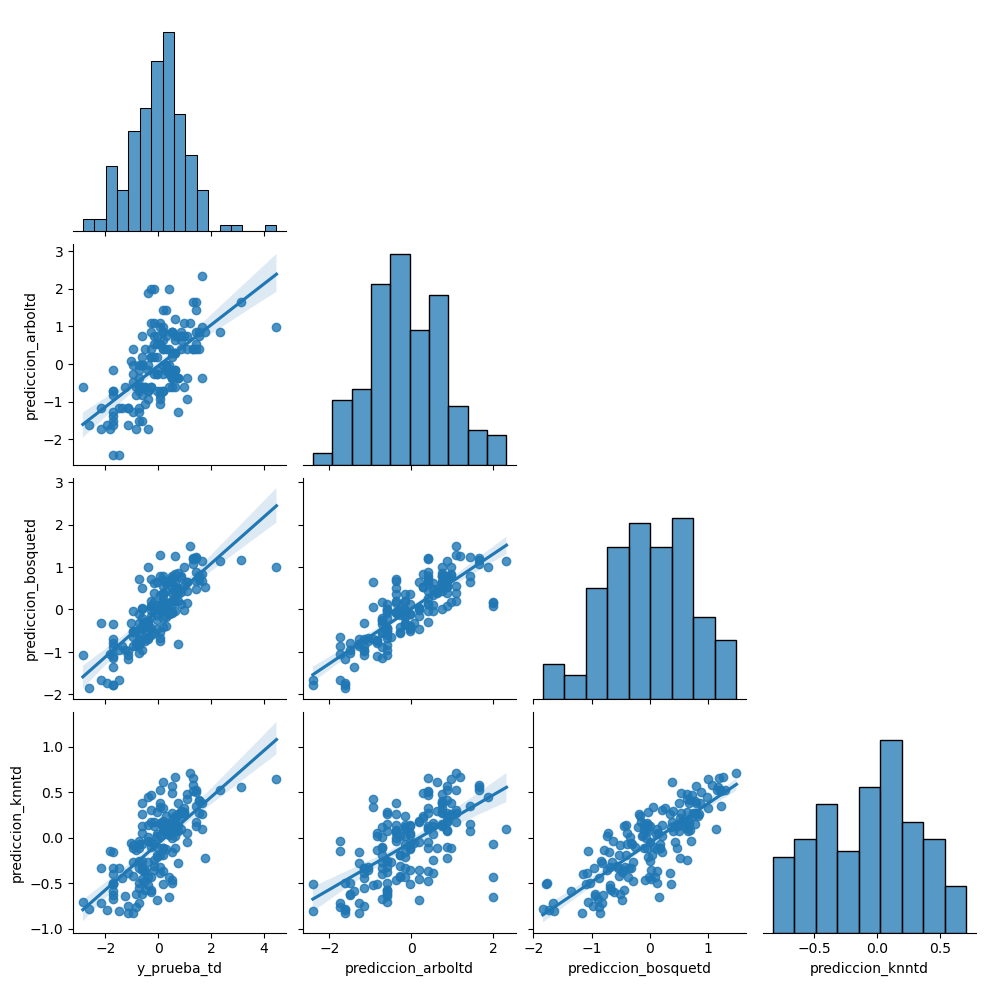

In [333]:
sns.jointplot(
    x = 'y_prueba_td',
    y = f'prediccion_{mejor_modelogeneral_td}',
    data = datos_td,
    kind = 'reg'
)

sns.lmplot(
    x = 'y_prueba_td',
    y = f'prediccion_{mejor_modelogeneral_td}',
    data = datos_td
)
plt.title(f"Comparación del Modelo '{mejor_modelogeneral_td}' vs Valores Reales")
plt.xlabel('Valores reales de tensión diastólica')
plt.ylabel(f'Predicción de {mejor_modelogeneral_td}')
plt.show()

sns.pairplot(datos_td, corner = True, kind = 'reg')
plt.show()

In [334]:
mejor_modelotd_obj = modelostd[mejor_modelogeneral_td]['modelo']

prediccion_perdidostd = mejor_modelotd_obj.predict(X_perdidos)

datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidostd
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imtd = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imtd, 'tension_diastolica')

df_imtde = df_imtd.copy()
df_imtde = estandarizar_todas_columnas(
    df_imtde,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "cc" (Circunferencia de Cintura)

In [335]:
columnas_seleccionadas = ['e', 's', 'u', 'p',
                        't', 'ts', 'td', 'gs',
                        'c', 'hdl', 'cc',
                        'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imtde.copy()
datos = df_imtde[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'cc'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['cct', 'pp']]

datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

In [336]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba_cc = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = arreglo_aleatorio[0],
    )

##### Arból de decisión

In [337]:
depths = list(range(3, 25))
r2_profundidad_cc = []
for depth in depths:
    arbolcc = DecisionTreeRegressor(max_depth = depth, random_state = arreglo_aleatorio[0])
    arbolcc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_arbolcc = arbolcc.predict(X_prueba)
    score_arbolcc = r2_score(y_prueba_cc, y_prediccion_arbolcc)
    r2_profundidad_cc.append(score_arbolcc)

profundidad_optima_arbolcc = depths[np.argmax(r2_profundidad_cc)]

mae_arbolcc = mean_absolute_error(y_prueba_cc, y_prediccion_arbolcc)
mse_arbolcc = mean_squared_error(y_prueba_cc, y_prediccion_arbolcc)
rmse_arbolcc = np.sqrt(mse_arbolcc)
r2_arbolcc = r2_score(y_prueba_cc, y_prediccion_arbolcc)

print("Profundidad óptima del árbol de desición arbolcc:", profundidad_optima_arbolcc)
print("Error absoluto medio de arbolcc:", round(mae_arbolcc, 2))
print("Error cuadrático medio de arbolcc:", round(mse_arbolcc, 2))
print("Raíz del error cuadrático medio de arbolcc:", round(rmse_arbolcc, 2))
print("R-cuadrado de arbolcc:", round((r2_arbolcc), 2))

Profundidad óptima del árbol de desición arbolcc: 3
Error absoluto medio de arbolcc: 0.57
Error cuadrático medio de arbolcc: 0.6
Raíz del error cuadrático medio de arbolcc: 0.77
R-cuadrado de arbolcc: 0.41


In [338]:
resultados_arbolcc = pd.DataFrame({
    'Profundidad óptima': [profundidad_optima_arbolcc],
    'RMSE arbolcc': [rmse_arbolcc],
    'MAE arbolcc': [mae_arbolcc],
    'R2 arbolcc': [r2_arbolcc],
    'MSE arbolcc': [mse_arbolcc]
})

exportar_metricas_a_excel(resultados_arbolcc, 'arbolcc')

##### Bosque aleatorio

In [339]:
estimadores = list(range(100, 125))
r2_estimadores_cc = []
for estimador in estimadores:
    bosquecc = RandomForestRegressor(n_estimators = estimador, random_state = arreglo_aleatorio[0])
    bosquecc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_bosquecc = bosquecc.predict(X_prueba)
    score_bosquecc = r2_score(y_prueba_cc, y_prediccion_bosquecc)
    r2_estimadores_cc.append(score_bosquecc)

estimador_optimo_bosquecc = estimadores[np.argmax(r2_estimadores_cc)]

mae_bosquecc = mean_absolute_error(y_prueba_cc, y_prediccion_bosquecc)
mse_bosquecc = mean_squared_error(y_prueba_cc, y_prediccion_bosquecc)
rmse_bosquecc = np.sqrt(mse_bosquecc)
r2_bosquecc = r2_score(y_prueba_cc, y_prediccion_bosquecc)

print("Estimador óptimo del bosquecc:", estimador_optimo_bosquecc)
print("Error absoluto medio de bosquecc:", round(mae_bosquecc, 2))
print("Error cuadrático medio de bosquecc:", round(mse_bosquecc, 2))
print("Raíz del error cuadrático medio de bosquecc:", round(rmse_bosquecc, 2))
print("R-cuadrado de bosquecc:", round((r2_bosquecc), 2))

Estimador óptimo del bosquecc: 115
Error absoluto medio de bosquecc: 0.43
Error cuadrático medio de bosquecc: 0.35
Raíz del error cuadrático medio de bosquecc: 0.59
R-cuadrado de bosquecc: 0.66


In [340]:
resultados_bosquecc = pd.DataFrame({
    'Estimador óptimo': [estimador_optimo_bosquecc],
    'RMSE bosquecc': [rmse_bosquecc],
    'MAE bosquecc': [mae_bosquecc],
    'R2 bosquecc': [r2_bosquecc],
    'MSE bosquecc': [mse_bosquecc]
})

exportar_metricas_a_excel(resultados_bosquecc, 'bosquecc')

##### KNN

In [341]:
k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 29, 31, 33, 35])
r2_k_cc = []
for valores_k in k:
    knncc = KNeighborsRegressor(n_neighbors = valores_k)
    knncc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_knncc = knncc.predict(X_prueba)
    score_knncc = r2_score(y_prueba_cc, y_prediccion_knncc)
    r2_k_cc.append(score_knncc)

k_optimo_knncc = k[np.argmax(r2_k_cc)]

mae_knncc = mean_absolute_error(y_prueba_cc, y_prediccion_knncc)
mse_knncc = mean_squared_error(y_prueba_cc, y_prediccion_knncc)
rmse_knncc = np.sqrt(mse_knncc)
r2_knncc = r2_score(y_prueba_cc, y_prediccion_knncc)

print("K óptimo de knncc:", k_optimo_knncc)
print("Error absoluto medio de knncc:", round(mae_knncc, 2))
print("Error cuadrático medio de knncc:", round(mse_knncc, 2))
print("Raíz del error cuadrático medio de knncc:", round(rmse_knncc, 2))
print("R-cuadrado de knncc:", round((r2_knncc), 2))

K óptimo de knncc: 3
Error absoluto medio de knncc: 0.53
Error cuadrático medio de knncc: 0.48
Raíz del error cuadrático medio de knncc: 0.69
R-cuadrado de knncc: 0.53


In [342]:
resultados_knncc = pd.DataFrame({
    'K óptimo': [k_optimo_knncc],
    'RMSE knncc': [rmse_knncc],
    'MAE knncc': [mae_knncc],
    'R2 knncc': [r2_knncc],
    'MSE knncc': [mse_knncc]
})

exportar_metricas_a_excel(resultados_knncc, 'knncc')

##### Elección del mejor modelo

In [343]:
modeloscc = {
    'arbolcc': {
        'modelo': arbolcc,
        'mae': mae_arbolcc,
        'mse': mse_arbolcc,
        'rmse': rmse_arbolcc,
        'r2': r2_arbolcc,
        'prediccion': y_prediccion_arbolcc
    },
    'bosquecc': {
        'modelo': bosquecc,
        'mae': mae_bosquecc,
        'mse': mse_bosquecc,
        'rmse': rmse_bosquecc,
        'r2': r2_bosquecc,
        'prediccion': y_prediccion_bosquecc
    },
    'knncc': {
        'modelo': knncc,
        'mae': mae_knncc,
        'mse': mse_knncc,
        'rmse': rmse_knncc,
        'r2': r2_knncc,
        'prediccion': y_prediccion_knncc
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_cc = min(modeloscc, key = lambda x: modeloscc[x][metrica] 
                          if metrica != 'r2' 
                          else -modeloscc[x][metrica])
    mejor_resultados = modeloscc[mejor_modelo_cc][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_cc} ({mejor_resultados:.2f})")

mejor_modelogeneral_cc = max(
    modeloscc,
    key = lambda x: (
        -modeloscc[x]['rmse'],
        -modeloscc[x]['mae'],
        modeloscc[x]['r2'],
        -modeloscc[x]['mse']
    )
)

print(f"\nEl mejor modelo para la predicción de colesterol total basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelogeneral_cc}")

y_prediccion_mejor_modelo = modeloscc[mejor_modelogeneral_cc]['prediccion']

datos_cc = pd.DataFrame({
    'y_prueba_cc': y_prueba_cc,
    'prediccion_arbolcc': modeloscc['arbolcc']['prediccion'],
    'prediccion_bosquecc': modeloscc['bosquecc']['prediccion'],
    'prediccion_knncc': modeloscc['knncc']['prediccion']
})

if mejor_modelogeneral_cc not in datos_cc.columns:
    datos_cc[f'prediccion_{mejor_modelogeneral_cc}'] = y_prediccion_mejor_modelo

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquecc (0.59)
Mejor Error Absoluto Medio (mae): 
 bosquecc (0.43)
Mejor R-cuadrado (r2): 
 bosquecc (0.66)
Mejor Error Cuadrático Medio (mse): 
 bosquecc (0.35)

El mejor modelo para la predicción de colesterol total basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquecc


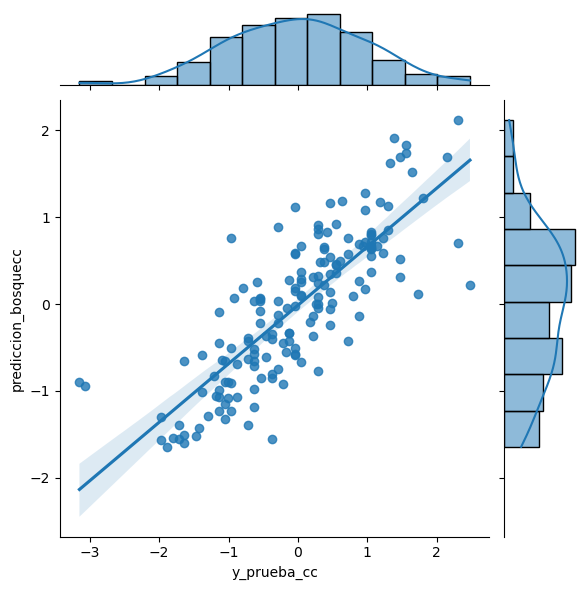

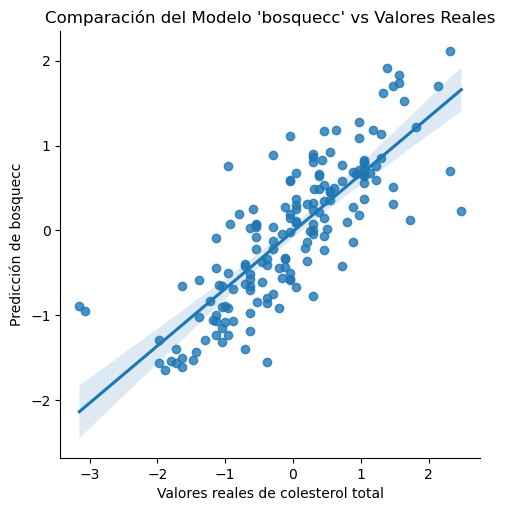

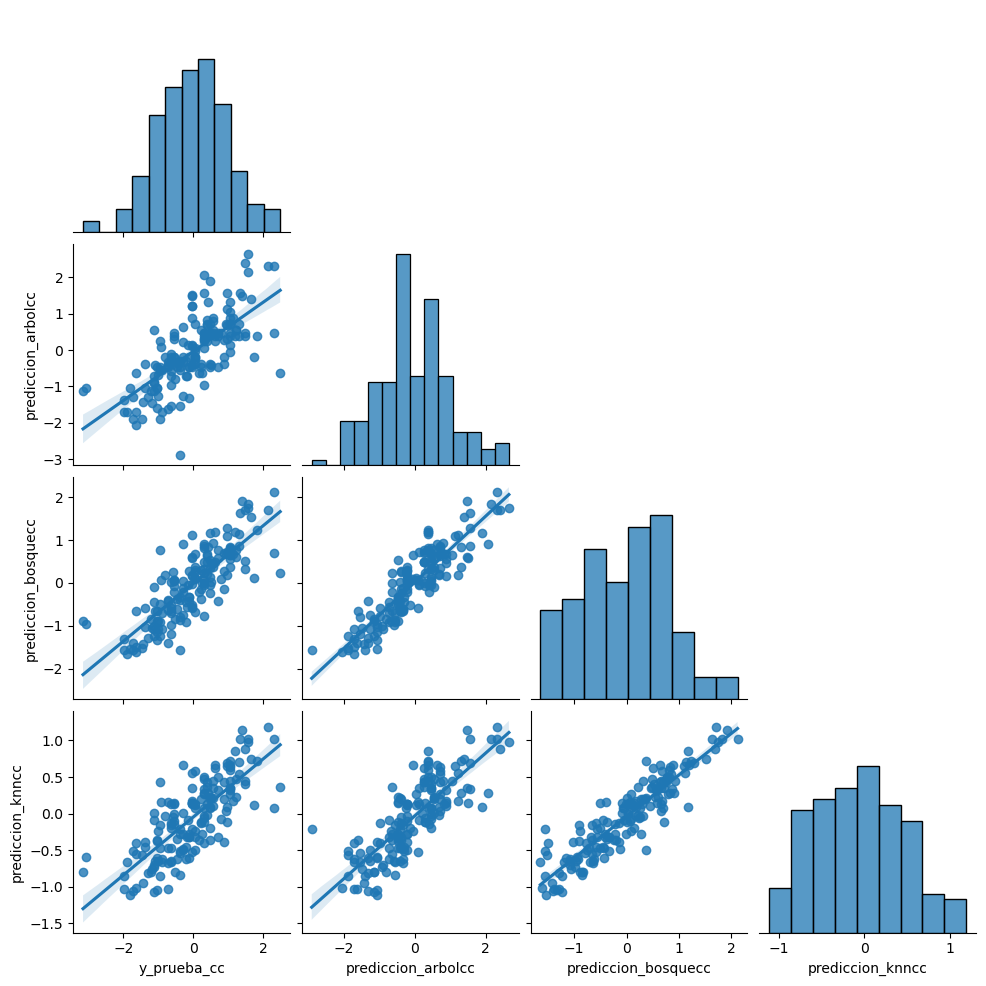

In [344]:
sns.jointplot(
    x = 'y_prueba_cc',
    y = f'prediccion_{mejor_modelogeneral_cc}',
    data = datos_cc,
    kind = 'reg'
)

sns.lmplot(
    x = 'y_prueba_cc',
    y = f'prediccion_{mejor_modelogeneral_cc}',
    data = datos_cc
)
plt.title(f"Comparación del Modelo '{mejor_modelogeneral_cc}' vs Valores Reales")
plt.xlabel('Valores reales de colesterol total')
plt.ylabel(f'Predicción de {mejor_modelogeneral_cc}')
plt.show()

sns.pairplot(datos_cc, corner = True, kind = 'reg')
plt.show()

In [345]:
mejor_modelocc_obj = modeloscc[mejor_modelogeneral_cc]['modelo']

prediccion_perdidoscc = mejor_modelocc_obj.predict(X_perdidos)

datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidoscc
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imcc = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imcc, 'colesterol_total')

df_imcce = df_imcc.copy()
df_imcce = estandarizar_todas_columnas(
    df_imcce,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "cct" (Circunferencia de Cintura / Talla) 

In [346]:
# La formula usual es: Circunferencia de Cintura (cm) / Talla (cm)
# Empero, si se divide en metros, el resultado es el mismo: Circunferencia de Cintura (m) / Talla (m)

# Completamos la columna cct, con la siguiente formula
df_imcc['cct'] = df_imcc['cc'] / df_imcc['t']

# Ahora copiamos los dataframes creados
df_imcct = df_imcc.copy()
# df_imcct = Dataframe Imputados Modelo CCT
df_imccte = df_imcct.copy()
# df_imccte = Dataframe Imputados Modelo CCT Estandarizado

# Estandarizamos df_imccte
df_imccte = estandarizar_todas_columnas(
    df_imccte,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "pp" (Perímetro de Pantorrilla)

In [347]:
columnas_seleccionadas = ['e', 's', 'u', 'p',
                          't', 'ts', 'td', 'gs',
                          'c', 'hdl', 'cc', 'pp',
                          'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imccte.copy()
datos = df_imccte[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'pp'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo]

datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

In [348]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba_pp = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = arreglo_aleatorio[0],
    )

#### Arból de decisión

In [349]:
depths = list(range(3, 25))
r2_profundidad_pp = []
for depth in depths:
    arbolpp = DecisionTreeRegressor(max_depth = depth, random_state = arreglo_aleatorio[0])
    arbolpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_arbolpp = arbolpp.predict(X_prueba)
    score_arbolpp = r2_score(y_prueba_pp, y_prediccion_arbolpp)
    r2_profundidad_pp.append(score_arbolpp)

profundidad_optima_arbolpp = depths[np.argmax(r2_profundidad_pp)]

mae_arbolpp = mean_absolute_error(y_prueba_pp, y_prediccion_arbolpp)
mse_arbolpp = mean_squared_error(y_prueba_pp, y_prediccion_arbolpp)
rmse_arbolpp = np.sqrt(mse_arbolpp)
r2_arbolpp = r2_score(y_prueba_pp, y_prediccion_arbolpp)

print("Profundidad óptima del árbol de desición arbolpp:", profundidad_optima_arbolpp)
print("Error absoluto medio de arbolpp:", round(mae_arbolpp, 2))
print("Error cuadrático medio de arbolpp:", round(mse_arbolpp, 2))
print("Raíz del error cuadrático medio de arbolpp:", round(rmse_arbolpp, 2))
print("R-cuadrado de arbolpp:", round((r2_arbolpp), 2))

Profundidad óptima del árbol de desición arbolpp: 6
Error absoluto medio de arbolpp: 0.77
Error cuadrático medio de arbolpp: 1.88
Raíz del error cuadrático medio de arbolpp: 1.37
R-cuadrado de arbolpp: -1.17


In [350]:
resultados_arbolpp = pd.DataFrame({
    'Profundidad óptima': [profundidad_optima_arbolpp],
    'RMSE arbolpp': [rmse_arbolpp],
    'MAE arbolpp': [mae_arbolpp],
    'R2 arbolpp': [r2_arbolpp],
    'MSE arbolpp': [mse_arbolpp]
})

exportar_metricas_a_excel(resultados_arbolpp, 'arbolpp')

##### Bosque aleatorio

In [351]:
estimadores = list(range(100, 125))
r2_estimadores_pp = []
for estimador in estimadores:
    bosquepp = RandomForestRegressor(n_estimators = estimador, random_state = arreglo_aleatorio[0])
    bosquepp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_bosquepp = bosquepp.predict(X_prueba)
    score_bosquepp = r2_score(y_prueba_pp, y_prediccion_bosquepp)
    r2_estimadores_pp.append(score_bosquepp)

estimador_optimo_bosquepp = estimadores[np.argmax(r2_estimadores_pp)]

mae_bosquepp = mean_absolute_error(y_prueba_pp, y_prediccion_bosquepp)
mse_bosquepp = mean_squared_error(y_prueba_pp, y_prediccion_bosquepp)
rmse_bosquepp = np.sqrt(mse_bosquepp)
r2_bosquepp = r2_score(y_prueba_pp, y_prediccion_bosquepp)

print("Estimador óptimo del bosquepp:", estimador_optimo_bosquepp)
print("Error absoluto medio de bosquepp:", round(mae_bosquepp, 2))
print("Error cuadrático medio de bosquepp:", round(mse_bosquepp, 2))
print("Raíz del error cuadrático medio de bosquepp:", round(rmse_bosquepp, 2))
print("R-cuadrado de bosquepp:", round((r2_bosquepp), 2))

Estimador óptimo del bosquepp: 110
Error absoluto medio de bosquepp: 0.63
Error cuadrático medio de bosquepp: 0.57
Raíz del error cuadrático medio de bosquepp: 0.76
R-cuadrado de bosquepp: 0.34


In [352]:
resultados_bosquepp = pd.DataFrame({
    'Estimador óptimo': [estimador_optimo_bosquepp],
    'RMSE bosquepp': [rmse_bosquepp],
    'MAE bosquepp': [mae_bosquepp],
    'R2 bosquepp': [r2_bosquepp],
    'MSE bosquepp': [mse_bosquepp]
})

exportar_metricas_a_excel(resultados_bosquepp, 'bosquepp')

##### KNN

In [353]:
k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 29, 31, 33, 35])
r2_k_pp = []
for valores_k in k:
    knnpp = KNeighborsRegressor(n_neighbors = valores_k)
    knnpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion_knnpp = knnpp.predict(X_prueba)
    score_knnpp = r2_score(y_prueba_pp, y_prediccion_knnpp)
    r2_k_pp.append(score_knnpp)

k_optimo_knnpp = k[np.argmax(r2_k_pp)]

mae_knnpp = mean_absolute_error(y_prueba_pp, y_prediccion_knnpp)
mse_knnpp = mean_squared_error(y_prueba_pp, y_prediccion_knnpp)
rmse_knnpp = np.sqrt(mse_knnpp)
r2_knnpp = r2_score(y_prueba_pp, y_prediccion_knnpp)

print("K óptimo de knnpp:", k_optimo_knnpp)
print("Error absoluto medio de knnpp:", round(mae_knnpp, 2))
print("Error cuadrático medio de knnpp:", round(mse_knnpp, 2))
print("Raíz del error cuadrático medio de knnpp:", round(rmse_knnpp, 2))
print("R-cuadrado de knnpp:", round((r2_knnpp), 2))

K óptimo de knnpp: 5
Error absoluto medio de knnpp: 0.76
Error cuadrático medio de knnpp: 0.83
Raíz del error cuadrático medio de knnpp: 0.91
R-cuadrado de knnpp: 0.04


In [354]:
resultados_knnpp = pd.DataFrame({
    'K óptimo': [k_optimo_knnpp],
    'RMSE knnpp': [rmse_knnpp],
    'MAE knnpp': [mae_knnpp],
    'R2 knnpp': [r2_knnpp],
    'MSE knnpp': [mse_knnpp]
})

exportar_metricas_a_excel(resultados_knnpp, 'knnpp')

##### Elección del mejor modelo

In [355]:
modelospp = {
    'arbolpp': {
        'modelo': arbolpp,
        'mae': mae_arbolpp,
        'mse': mse_arbolpp,
        'rmse': rmse_arbolpp,
        'r2': r2_arbolpp,
        'prediccion': y_prediccion_arbolpp
    },
    'bosquepp': {
        'modelo': bosquepp,
        'mae': mae_bosquepp,
        'mse': mse_bosquepp,
        'rmse': rmse_bosquepp,
        'r2': r2_bosquepp,
        'prediccion': y_prediccion_bosquepp
    },
    'knnpp': {
        'modelo': knnpp,
        'mae': mae_knnpp,
        'mse': mse_knnpp,
        'rmse': rmse_knnpp,
        'r2': r2_knnpp,
        'prediccion': y_prediccion_knnpp
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_pp = min(modelospp, key = lambda x: modelospp[x][metrica] 
                          if metrica != 'r2' 
                          else -modelospp[x][metrica])
    mejor_resultados = modelospp[mejor_modelo_pp][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_pp} ({mejor_resultados:.2f})")

mejor_modelogeneral_pp = max(
    modelospp,
    key = lambda x: (
        -modelospp[x]['rmse'],
        -modelospp[x]['mae'],
        modelospp[x]['r2'],
        -modelospp[x]['mse']
    )
)

print(f"\nEl mejor modelo para la predicción de perímetro de pantorrilla basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelogeneral_pp}")

y_prediccion_mejor_modelo = modelospp[mejor_modelogeneral_pp]['prediccion']

datos_pp = pd.DataFrame({
    'y_prueba_pp': y_prueba_pp,
    'prediccion_arbolpp': modelospp['arbolpp']['prediccion'],
    'prediccion_bosquepp': modelospp['bosquepp']['prediccion'],
    'prediccion_knnpp': modelospp['knnpp']['prediccion']
})

if mejor_modelogeneral_pp not in datos_pp.columns:
    datos_pp[f'prediccion_{mejor_modelogeneral_pp}'] = y_prediccion_mejor_modelo

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquepp (0.76)
Mejor Error Absoluto Medio (mae): 
 bosquepp (0.63)
Mejor R-cuadrado (r2): 
 bosquepp (0.34)
Mejor Error Cuadrático Medio (mse): 
 bosquepp (0.57)

El mejor modelo para la predicción de perímetro de pantorrilla basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquepp


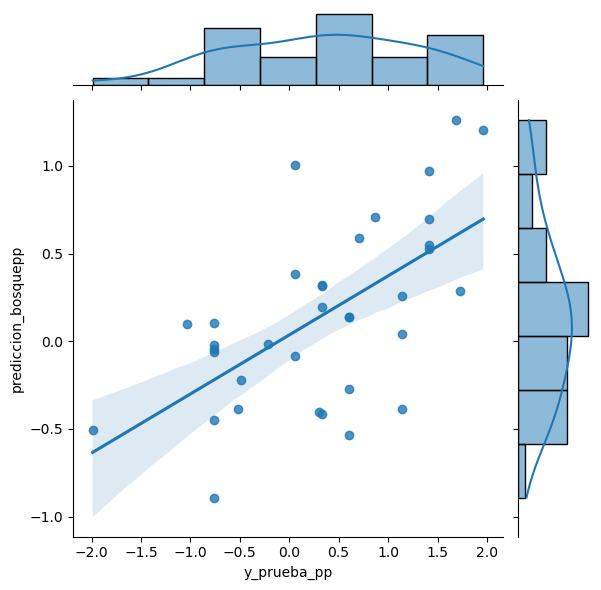

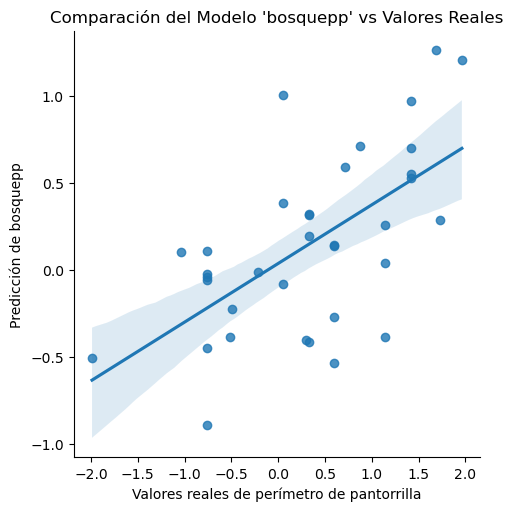

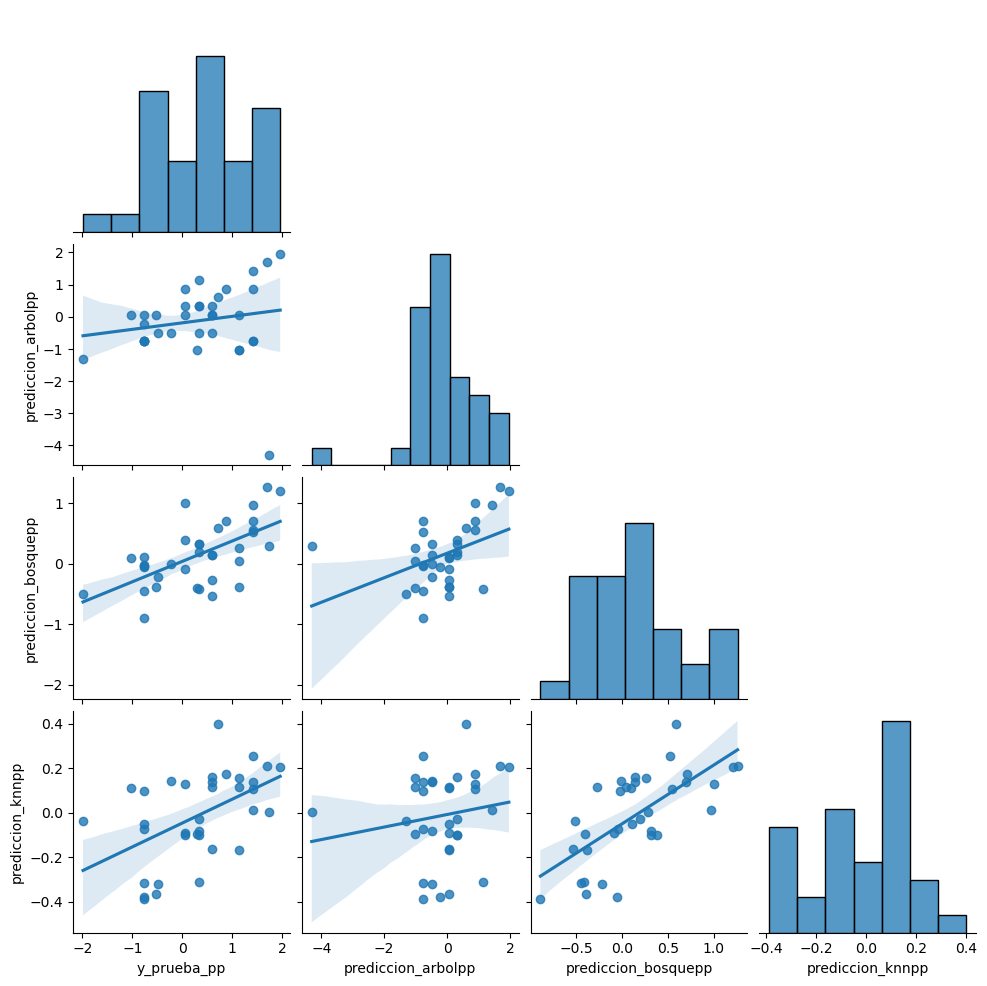

In [356]:
sns.jointplot(
    x = 'y_prueba_pp',
    y = f'prediccion_{mejor_modelogeneral_pp}',
    data = datos_pp,
    kind = 'reg'
)

sns.lmplot(
    x = 'y_prueba_pp',
    y = f'prediccion_{mejor_modelogeneral_pp}',
    data = datos_pp
)
plt.title(f"Comparación del Modelo '{mejor_modelogeneral_pp}' vs Valores Reales")
plt.xlabel('Valores reales de perímetro de pantorrilla')
plt.ylabel(f'Predicción de {mejor_modelogeneral_pp}')
plt.show()

sns.pairplot(datos_pp, corner = True, kind = 'reg')
plt.show()

In [357]:
mejor_modelopp_obl = modelospp[mejor_modelogeneral_pp]['modelo']

prediccion_perdidospp = mejor_modelopp_obl.predict(X_perdidos)

datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidospp
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_impp = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_impp, 'modelo_completo')

df_imppc = df_impp.copy()
df_imppe = estandarizar_todas_columnas(
    df_imppc,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)